## Data Processing for Power Consumption Prediction Model of Sejong University

In [ ]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import sys
import math
import numpy as np
import pandas as pd
import openpyxl
import datetime as dt
import seaborn as sns
from scipy import stats
import lightgbm as lgb
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle
from sklearn.externals import joblib

import warnings
# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 gglot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False

warnings.filterwarnings('ignore')

## Raw Data 가져오기

In [86]:
# wb = openpyxl.load_workbook('sejong_power_consumption.xlsx')
 
# # 현재 Active Sheet 얻기
# ws = wb.active
# # ws = wb.get_sheet_by_name("Sheet1")
# ws = wb.get_sheet_by_name("01-3535-9172")
# ws

# 하나의 열 가져오기
# df['컬럼명']

# 두개 이상의 열 가져오기
# df[['컬럼명1', '컬럼명2']]

df= pd.read_excel('sejong_power_consumption.xlsx', sheet_name ="01-3535-9172" )
df

고객번호        년월일  00:15:00  00:30:00  00:45:00  01:00:00  \
0     01-3535-9172 2015-01-01    406.80    414.00    406.44    411.12   
1     01-3535-9172 2015-01-02    437.40    436.68    423.36    438.12   
2     01-3535-9172 2015-01-03    425.52    420.84    413.28    414.00   
3     01-3535-9172 2015-01-04    402.12    402.84    394.56    396.00   
4     01-3535-9172 2015-01-05    432.36    433.08    420.12    421.56   
5     01-3535-9172 2015-01-06    405.72    414.00    411.84    410.76   
6     01-3535-9172 2015-01-07    455.40    454.32    446.04    440.64   
7     01-3535-9172 2015-01-08    453.96    442.08    441.36    443.16   
8     01-3535-9172 2015-01-09    452.88    445.68    440.28    432.72   
9     01-3535-9172 2015-01-10    421.92    410.04    410.40    415.80   
10    01-3535-9172 2015-01-11    417.60    414.00    415.80    397.08   
11    01-3535-9172 2015-01-12    426.24    433.08    420.84    416.88   
12    01-3535-9172 2015-01-13    443.16    433.08    433.80    433.44   
13    01-3535-9172 2015-01-14    412.56    411.12    411.84    412.56   
14    01-3535-9172 2015-01-15    413.28    415.80    411.12    407.88   
15    01-3535-9172 2015-01-16    401.40    407.16    406.44    399.60   
16    01-3535-9172 2015-01-17    407.16    407.88    407.52    399.60   
17    01-3535-9172 2015-01-18    383.76    381.24    382.68    382.32   
18    01-3535-9172 2015-01-19    394.20    388.80    389.16    391.68   
19    01-3535-9172 2015-01-20    424.44    430.20    421.92    427.32   
20    01-3535-9172 2015-01-21    407.16    408.96    408.24    403.92   
21    01-3535-9172 2015-01-22    414.00    415.08    410.04    407.52   
22    01-3535-9172 2015-01-23    397.08    398.16    393.84    397.80   
23    01-3535-9172 2015-01-24    382.68    386.28    392.04    381.60   
24    01-3535-9172 2015-01-25    352.44    356.76    344.52    339.48   
25    01-3535-9172 2015-01-26    354.96    354.96    352.80    348.12   
26    01-3535-9172 2015-01-27    412.92    404.64    400.32    395.28   
27    01-3535-9172 2015-01-28    425.16    416.52    421.56    417.24   
28    01-3535-9172 2015-01-29    416.88    411.48    421.56    419.40   
29    01-3535-9172 2015-01-30    401.76    405.00    406.80    411.48   
...            ...        ...       ...       ...       ...       ...   
2067  01-3535-9172 2020-09-01    441.60    437.28    430.08    425.28   
2068  01-3535-9172 2020-09-02    432.00    422.40    420.96    417.12   
2069  01-3535-9172 2020-09-03    415.68    414.24    411.36    410.88   
2070  01-3535-9172 2020-09-04    408.96    406.08    405.12    399.84   
2071  01-3535-9172 2020-09-05    405.60    396.48    393.12    390.72   
2072  01-3535-9172 2020-09-06    388.80    387.36    383.04    383.04   
2073  01-3535-9172 2020-09-07    374.40    372.96    369.12    369.60   
2074  01-3535-9172 2020-09-08    399.36    396.00    394.56    394.56   
2075  01-3535-9172 2020-09-09    407.04    407.52    408.48    402.24   
2076  01-3535-9172 2020-09-10    433.92    431.04    426.72    422.40   
2077  01-3535-9172 2020-09-11    415.20    410.88    407.52    401.76   
2078  01-3535-9172 2020-09-12    405.60    408.48    402.24    399.36   
2079  01-3535-9172 2020-09-13    389.28    380.64    380.16    378.24   
2080  01-3535-9172 2020-09-14    384.96    381.12    378.24    379.20   
2081  01-3535-9172 2020-09-15    406.08    394.56    396.00    393.12   
2082  01-3535-9172 2020-09-16    417.12    405.60    408.96    403.20   
2083  01-3535-9172 2020-09-17    415.20    414.24    412.80    404.16   
2084  01-3535-9172 2020-09-18    408.00    403.68    403.68    402.24   
2085  01-3535-9172 2020-09-19    413.76    398.88    396.00    396.00   
2086  01-3535-9172 2020-09-20    394.56    384.00    370.56    370.08   
2087  01-3535-9172 2020-09-21    382.08    378.72    372.00    371.52   
2088  01-3535-9172 2020-09-22    397.44    388.32    383.04    384.96   
2089  01-3535-9172 2020-09-23    390.72    387.84    383.04    378.24   

## Raw Data 정보 확인

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 98 columns):
고객번호        2097 non-null object
년월일         2097 non-null datetime64[ns]
00:15:00    2090 non-null float64
00:30:00    2087 non-null float64
00:45:00    2086 non-null float64
01:00:00    2089 non-null float64
01:15:00    2085 non-null float64
01:30:00    2086 non-null float64
01:45:00    2085 non-null float64
02:00:00    2088 non-null float64
02:15:00    2085 non-null float64
02:30:00    2086 non-null float64
02:45:00    2087 non-null float64
03:00:00    2090 non-null float64
03:15:00    2086 non-null float64
03:30:00    2087 non-null float64
03:45:00    2086 non-null float64
04:00:00    2083 non-null float64
04:15:00    2085 non-null float64
04:30:00    2085 non-null float64
04:45:00    2082 non-null float64
05:00:00    2079 non-null float64
05:15:00    2079 non-null float64
05:30:00    2080 non-null float64
05:45:00    2082 non-null float64
06:00:00    2076 non-null float64
06:

## Dataframe의 index를 date로 설정

In [88]:
# set index to date
df=df.set_index('년월일')
df

고객번호  00:15:00  00:30:00  00:45:00  01:00:00  01:15:00  \
년월일                                                                          
2015-01-01  01-3535-9172    406.80    414.00    406.44    411.12    402.84   
2015-01-02  01-3535-9172    437.40    436.68    423.36    438.12    418.32   
2015-01-03  01-3535-9172    425.52    420.84    413.28    414.00    410.04   
2015-01-04  01-3535-9172    402.12    402.84    394.56    396.00    398.16   
2015-01-05  01-3535-9172    432.36    433.08    420.12    421.56    416.16   
2015-01-06  01-3535-9172    405.72    414.00    411.84    410.76    406.08   
2015-01-07  01-3535-9172    455.40    454.32    446.04    440.64    440.28   
2015-01-08  01-3535-9172    453.96    442.08    441.36    443.16    442.08   
2015-01-09  01-3535-9172    452.88    445.68    440.28    432.72    438.12   
2015-01-10  01-3535-9172    421.92    410.04    410.40    415.80    412.20   
2015-01-11  01-3535-9172    417.60    414.00    415.80    397.08    395.64   
2015-01-12  01-3535-9172    426.24    433.08    420.84    416.88    419.40   
2015-01-13  01-3535-9172    443.16    433.08    433.80    433.44    423.00   
2015-01-14  01-3535-9172    412.56    411.12    411.84    412.56    407.16   
2015-01-15  01-3535-9172    413.28    415.80    411.12    407.88    408.96   
2015-01-16  01-3535-9172    401.40    407.16    406.44    399.60    393.48   
2015-01-17  01-3535-9172    407.16    407.88    407.52    399.60    404.28   
2015-01-18  01-3535-9172    383.76    381.24    382.68    382.32    381.24   
2015-01-19  01-3535-9172    394.20    388.80    389.16    391.68    387.36   
2015-01-20  01-3535-9172    424.44    430.20    421.92    427.32    417.96   
2015-01-21  01-3535-9172    407.16    408.96    408.24    403.92    401.76   
2015-01-22  01-3535-9172    414.00    415.08    410.04    407.52    411.84   
2015-01-23  01-3535-9172    397.08    398.16    393.84    397.80    398.88   
2015-01-24  01-3535-9172    382.68    386.28    392.04    381.60    378.00   
2015-01-25  01-3535-9172    352.44    356.76    344.52    339.48    335.16   
2015-01-26  01-3535-9172    354.96    354.96    352.80    348.12    344.52   
2015-01-27  01-3535-9172    412.92    404.64    400.32    395.28    390.96   
2015-01-28  01-3535-9172    425.16    416.52    421.56    417.24    421.56   
2015-01-29  01-3535-9172    416.88    411.48    421.56    419.40    414.72   
2015-01-30  01-3535-9172    401.76    405.00    406.80    411.48    402.84   
...                  ...       ...       ...       ...       ...       ...   
2020-09-01  01-3535-9172    441.60    437.28    430.08    425.28    432.96   
2020-09-02  01-3535-9172    432.00    422.40    420.96    417.12       NaN   
2020-09-03  01-3535-9172    415.68    414.24    411.36    410.88    425.28   
2020-09-04  01-3535-9172    408.96    406.08    405.12    399.84    413.28   
2020-09-05  01-3535-9172    405.60    396.48    393.12    390.72    399.84   
2020-09-06  01-3535-9172    388.80    387.36    383.04    383.04    391.20   
2020-09-07  01-3535-9172    374.40    372.96    369.12    369.60    381.60   
2020-09-08  01-3535-9172    399.36    396.00    394.56    394.56    406.08   
2020-09-09  01-3535-9172    407.04    407.52    408.48    402.24    409.44   
2020-09-10  01-3535-9172    433.92    431.04    426.72    422.40    431.52   
2020-09-11  01-3535-9172    415.20    410.88    407.52    401.76    416.16   
2020-09-12  01-3535-9172    405.60    408.48    402.24    399.36    407.52   
2020-09-13  01-3535-9172    389.28    380.64    380.16    378.24    384.96   
2020-09-14  01-3535-9172    384.96    381.12    378.24    379.20    386.88   
2020-09-15  01-3535-9172    406.08    394.56    396.00    393.12    394.56   
2020-09-16  01-3535-9172    417.12    405.60    408.96    403.20    412.32   
2020-09-17  01-3535-9172    415.20    414.24    412.80    404.16    416.64   
2020-09-18  01-3535-9172    408.00    403.68    403.68    402.24    414.72   
2020-09-19  01-3535-9172    413.76    398.

In [89]:
# drop client number column
df = df.drop(columns='고객번호', axis=1)
df

00:15:00  00:30:00  00:45:00  01:00:00  01:15:00  01:30:00  \
년월일                                                                      
2015-01-01    406.80    414.00    406.44    411.12    402.84    403.56   
2015-01-02    437.40    436.68    423.36    438.12    418.32    420.48   
2015-01-03    425.52    420.84    413.28    414.00    410.04    404.64   
2015-01-04    402.12    402.84    394.56    396.00    398.16    394.56   
2015-01-05    432.36    433.08    420.12    421.56    416.16    409.68   
2015-01-06    405.72    414.00    411.84    410.76    406.08    404.28   
2015-01-07    455.40    454.32    446.04    440.64    440.28    428.40   
2015-01-08    453.96    442.08    441.36    443.16    442.08    435.60   
2015-01-09    452.88    445.68    440.28    432.72    438.12    438.48   
2015-01-10    421.92    410.04    410.40    415.80    412.20    419.04   
2015-01-11    417.60    414.00    415.80    397.08    395.64    386.64   
2015-01-12    426.24    433.08    420.84    416.88    419.40    429.84   
2015-01-13    443.16    433.08    433.80    433.44    423.00    428.76   
2015-01-14    412.56    411.12    411.84    412.56    407.16    409.32   
2015-01-15    413.28    415.80    411.12    407.88    408.96    405.36   
2015-01-16    401.40    407.16    406.44    399.60    393.48    400.32   
2015-01-17    407.16    407.88    407.52    399.60    404.28    397.44   
2015-01-18    383.76    381.24    382.68    382.32    381.24    376.56   
2015-01-19    394.20    388.80    389.16    391.68    387.36    398.88   
2015-01-20    424.44    430.20    421.92    427.32    417.96    427.32   
2015-01-21    407.16    408.96    408.24    403.92    401.76    398.88   
2015-01-22    414.00    415.08    410.04    407.52    411.84    401.76   
2015-01-23    397.08    398.16    393.84    397.80    398.88    398.16   
2015-01-24    382.68    386.28    392.04    381.60    378.00    375.84   
2015-01-25    352.44    356.76    344.52    339.48    335.16    329.04   
2015-01-26    354.96    354.96    352.80    348.12    344.52    338.76   
2015-01-27    412.92    404.64    400.32    395.28    390.96    394.92   
2015-01-28    425.16    416.52    421.56    417.24    421.56    409.32   
2015-01-29    416.88    411.48    421.56    419.40    414.72    412.56   
2015-01-30    401.76    405.00    406.80    411.48    402.84    394.56   
...              ...       ...       ...       ...       ...       ...   
2020-09-01    441.60    437.28    430.08    425.28    432.96    424.80   
2020-09-02    432.00    422.40    420.96    417.12       NaN    426.24   
2020-09-03    415.68    414.24    411.36    410.88    425.28    412.80   
2020-09-04    408.96    406.08    405.12    399.84    413.28    399.84   
2020-09-05    405.60    396.48    393.12    390.72    399.84    389.76   
2020-09-06    388.80    387.36    383.04    383.04    391.20    386.88   
2020-09-07    374.40    372.96    369.12    369.60    381.60    371.52   
2020-09-08    399.36    396.00    394.56    394.56    406.08    396.00   
2020-09-09    407.04    407.52    408.48    402.24    409.44    403.68   
2020-09-10    433.92    431.04    426.72    422.40    431.52    426.24   
2020-09-11    415.20    410.88    407.52    401.76    416.16    409.44   
2020-09-12    405.60    408.48    402.24    399.36    407.52    394.08   
2020-09-13    389.28    380.64    380.16    378.24    384.96    383.04   
2020-09-14    384.96    381.12    378.24    379.20    386.88    381.60   
2020-09-15    406.08    394.56    396.00    393.12    394.56    388.80   
2020-09-16    417.12    405.60    408.96    403.20    412.32    401.76   
2020-09-17    415.20    414.24    412.80    404.16    416.64    410.40   
2020-09-18    408.00    403.68    403.68    402.24    414.72    403.68   
2020-09-19    413.76    398.88    396.00    396.00    402.72    395.04   
2020-09-20    394.56    384.00    370.56    370.08    382.56    371.52   
2020-09-21    382.08    378.72    372.00    371.52    381.60    377.28   
2020-09-22    39

## 결측값이 존재하는 부분을 선형 보간법으로 처리

In [90]:
# null 값이 있는 부분 확인
df.isnull().sum().sum()

1187

In [91]:
# 결측치가 발생하는 날짜를 채워넣음
# 데이터가 들어오지 않은 날짜를 nan으로 채움
df = df.resample('D').first()
df

00:15:00  00:30:00  00:45:00  01:00:00  01:15:00  01:30:00  \
년월일                                                                      
2015-01-01    406.80    414.00    406.44    411.12    402.84    403.56   
2015-01-02    437.40    436.68    423.36    438.12    418.32    420.48   
2015-01-03    425.52    420.84    413.28    414.00    410.04    404.64   
2015-01-04    402.12    402.84    394.56    396.00    398.16    394.56   
2015-01-05    432.36    433.08    420.12    421.56    416.16    409.68   
2015-01-06    405.72    414.00    411.84    410.76    406.08    404.28   
2015-01-07    455.40    454.32    446.04    440.64    440.28    428.40   
2015-01-08    453.96    442.08    441.36    443.16    442.08    435.60   
2015-01-09    452.88    445.68    440.28    432.72    438.12    438.48   
2015-01-10    421.92    410.04    410.40    415.80    412.20    419.04   
2015-01-11    417.60    414.00    415.80    397.08    395.64    386.64   
2015-01-12    426.24    433.08    420.84    416.88    419.40    429.84   
2015-01-13    443.16    433.08    433.80    433.44    423.00    428.76   
2015-01-14    412.56    411.12    411.84    412.56    407.16    409.32   
2015-01-15    413.28    415.80    411.12    407.88    408.96    405.36   
2015-01-16    401.40    407.16    406.44    399.60    393.48    400.32   
2015-01-17    407.16    407.88    407.52    399.60    404.28    397.44   
2015-01-18    383.76    381.24    382.68    382.32    381.24    376.56   
2015-01-19    394.20    388.80    389.16    391.68    387.36    398.88   
2015-01-20    424.44    430.20    421.92    427.32    417.96    427.32   
2015-01-21    407.16    408.96    408.24    403.92    401.76    398.88   
2015-01-22    414.00    415.08    410.04    407.52    411.84    401.76   
2015-01-23    397.08    398.16    393.84    397.80    398.88    398.16   
2015-01-24    382.68    386.28    392.04    381.60    378.00    375.84   
2015-01-25    352.44    356.76    344.52    339.48    335.16    329.04   
2015-01-26    354.96    354.96    352.80    348.12    344.52    338.76   
2015-01-27    412.92    404.64    400.32    395.28    390.96    394.92   
2015-01-28    425.16    416.52    421.56    417.24    421.56    409.32   
2015-01-29    416.88    411.48    421.56    419.40    414.72    412.56   
2015-01-30    401.76    405.00    406.80    411.48    402.84    394.56   
...              ...       ...       ...       ...       ...       ...   
2020-09-01    441.60    437.28    430.08    425.28    432.96    424.80   
2020-09-02    432.00    422.40    420.96    417.12       NaN    426.24   
2020-09-03    415.68    414.24    411.36    410.88    425.28    412.80   
2020-09-04    408.96    406.08    405.12    399.84    413.28    399.84   
2020-09-05    405.60    396.48    393.12    390.72    399.84    389.76   
2020-09-06    388.80    387.36    383.04    383.04    391.20    386.88   
2020-09-07    374.40    372.96    369.12    369.60    381.60    371.52   
2020-09-08    399.36    396.00    394.56    394.56    406.08    396.00   
2020-09-09    407.04    407.52    408.48    402.24    409.44    403.68   
2020-09-10    433.92    431.04    426.72    422.40    431.52    426.24   
2020-09-11    415.20    410.88    407.52    401.76    416.16    409.44   
2020-09-12    405.60    408.48    402.24    399.36    407.52    394.08   
2020-09-13    389.28    380.64    380.16    378.24    384.96    383.04   
2020-09-14    384.96    381.12    378.24    379.20    386.88    381.60   
2020-09-15    406.08    394.56    396.00    393.12    394.56    388.80   
2020-09-16    417.12    405.60    408.96    403.20    412.32    401.76   
2020-09-17    415.20    414.24    412.80    404.16    416.64    410.40   
2020-09-18    408.00    403.68    403.68    402.24    414.72    403.68   
2020-09-19    413.76    398.88    396.00    396.00    402.72    395.04   
2020-09-20    394.56    384.00    370.56    370.08    382.56    371.52   
2020-09-21    382.08    378.72    372.00    371.52    381.60    377.28   
2020-09-22    39

In [92]:
# 2018년 11월 19일 확인
df['2018-11-19':'2018-11-19']

00:15:00  00:30:00  00:45:00  01:00:00  01:15:00  01:30:00  \
년월일                                                                      
2018-11-19       NaN       NaN       NaN       NaN       NaN       NaN   

            01:45:00  02:00:00  02:15:00  02:30:00  ...  21:45:00  22:00:00  \
년월일                                                 ...                       
2018-11-19       NaN       NaN       NaN       NaN  ...       NaN       NaN   

            22:15:00  22:30:00  22:45:00  23:00:00  23:15:00  23:30:00  \
년월일                                                                      
2018-11-19       NaN       NaN       NaN       NaN       NaN       NaN   

            23:45:00  00:00:00  
년월일                             
2018-11-19       NaN       NaN  

[1 rows x 96 columns]

In [93]:
# 결측값을 채워넣음
# 시계열 데이터의 값에 선형으로 비례하는 방법으로 선형 보간법을 사용하여 채워넣기
df=df.interpolate()
df.isnull().sum()

00:15:00    0
00:30:00    0
00:45:00    0
01:00:00    0
01:15:00    0
01:30:00    0
01:45:00    0
02:00:00    0
02:15:00    0
02:30:00    0
02:45:00    0
03:00:00    0
03:15:00    0
03:30:00    0
03:45:00    0
04:00:00    0
04:15:00    0
04:30:00    0
04:45:00    0
05:00:00    0
05:15:00    0
05:30:00    0
05:45:00    0
06:00:00    0
06:15:00    0
06:30:00    0
06:45:00    0
07:00:00    0
07:15:00    0
07:30:00    0
           ..
16:45:00    0
17:00:00    0
17:15:00    0
17:30:00    0
17:45:00    0
18:00:00    0
18:15:00    0
18:30:00    0
18:45:00    0
19:00:00    0
19:15:00    0
19:30:00    0
19:45:00    0
20:00:00    0
20:15:00    0
20:30:00    0
20:45:00    0
21:00:00    0
21:15:00    0
21:30:00    0
21:45:00    0
22:00:00    0
22:15:00    0
22:30:00    0
22:45:00    0
23:00:00    0
23:15:00    0
23:30:00    0
23:45:00    0
00:00:00    0
Length: 96, dtype: int64

## 15분 단위의 전력 사용량 데이터를 1시간 단위로 구성

In [94]:
# dataframe 생성
df2 = pd.DataFrame()

# dataframe에 각 시간대별로 전력사용량을 더해서 컬럼 생성
for i in range(0,24) :
    
    if(i==23) :
        df2[dt.time(i,0)] = df[dt.time(i,15)]+df[dt.time(i,30)]+df[dt.time(i,45)]+df[dt.time(0,0)]
        
    else :
        df2[dt.time(i,0)] = df[dt.time(i,15)]+df[dt.time(i,30)]+df[dt.time(i,45)]+df[dt.time(i+1,0)]
    
df2

00:00:00  01:00:00  02:00:00  03:00:00  04:00:00  05:00:00  \
년월일                                                                      
2015-01-01   1638.36   1603.80   1578.24   1561.68   1550.52   1564.20   
2015-01-02   1735.56   1681.56   1668.24   1634.04   1639.80   1706.76   
2015-01-03   1673.64   1632.60   1598.04   1568.88   1581.12   1580.04   
2015-01-04   1595.52   1582.56   1542.60   1526.04   1526.76   1512.36   
2015-01-05   1707.12   1632.60   1607.04   1622.88   1587.96   1556.64   
2015-01-06   1642.32   1612.80   1613.16   1572.84   1540.44   1585.80   
2015-01-07   1796.40   1722.60   1696.68   1667.52   1649.16   1671.48   
2015-01-08   1780.56   1747.08   1743.48   1728.36   1728.72   1716.12   
2015-01-09   1771.56   1726.56   1692.72   1686.96   1657.08   1645.20   
2015-01-10   1658.16   1640.88   1591.20   1600.20   1587.24   1586.88   
2015-01-11   1644.48   1551.96   1539.72   1528.92   1496.88   1480.32   
2015-01-12   1697.04   1662.12   1623.60   1606.68   1602.00   1661.40   
2015-01-13   1743.48   1699.56   1639.80   1627.92   1617.12   1605.60   
2015-01-14   1648.08   1627.92   1608.84   1608.48   1591.92   1654.92   
2015-01-15   1648.08   1634.40   1614.24   1593.00   1571.40   1580.40   
2015-01-16   1614.60   1590.48   1550.88   1522.44   1530.72   1548.00   
2015-01-17   1622.16   1596.24   1576.80   1559.52   1542.60   1554.48   
2015-01-18   1530.00   1514.88   1513.44   1491.84   1497.24   1469.16   
2015-01-19   1563.84   1565.64   1509.48   1478.16   1487.52   1502.64   
2015-01-20   1703.88   1689.84   1656.00   1653.84   1655.64   1693.80   
2015-01-21   1628.28   1588.68   1572.12   1563.84   1553.04   1549.80   
2015-01-22   1646.64   1609.56   1557.00   1556.28   1549.44   1531.80   
2015-01-23   1586.88   1593.00   1574.64   1530.36   1497.24   1463.76   
2015-01-24   1542.60   1502.28   1475.64   1443.24   1411.92   1434.24   
2015-01-25   1393.20   1335.96   1342.44   1312.56   1309.68   1298.16   
2015-01-26   1410.84   1367.64   1359.36   1360.80   1339.20   1394.64   
2015-01-27   1613.16   1562.76   1506.24   1488.96   1478.16   1491.12   
2015-01-28   1680.48   1651.32   1636.56   1634.76   1601.64   1588.32   
2015-01-29   1669.32   1641.60   1585.08   1570.68   1564.92   1572.84   
2015-01-30   1625.04   1582.56   1553.40   1563.12   1545.12   1539.72   
...              ...       ...       ...       ...       ...       ...   
2020-09-01   1734.24   1697.76   1654.08   1635.84   1593.12   1564.32   
2020-09-02   1692.48   1694.16   1655.28   1660.32   1609.92   1576.32   
2020-09-03   1652.16   1656.96   1631.04   1604.16   1560.00   1519.68   
2020-09-04   1620.00   1608.96   1573.44   1550.88   1509.12   1507.20   
2020-09-05   1585.92   1566.72   1543.44   1537.92   1474.56   1453.92   
2020-09-06   1542.24   1546.56   1521.60   1510.56   1448.16   1427.52   
2020-09-07   1486.08   1495.68   1467.36   1457.76   1423.68   1402.08   
2020-09-08   1584.48   1588.80   1548.96   1536.00   1489.92   1478.88   
2020-09-09   1625.28   1620.96   1584.00   1571.04   1522.08   1505.28   
2020-09-10   1714.08   1704.96   1678.08   1668.96   1628.64   1609.44   
2020-09-11   1635.36   1632.00   1583.04   1577.76   1529.28   1515.36   
2020-09-12   1615.68   1577.28   1534.56   1535.04   1491.84   1464.96   
2020-09-13   1528.32   1524.96   1488.48   1483.68   1454.40   1434.24   
2020-09-14   1523.52   1528.32   1488.00   1479.36   1434.72   1407.36   
2020-09-15   1589.76   1566.24   1530.72   1517.28   1467.36   1454.88   
2020-09-16   1634.88   1606.08   1567.20   1555.20   1522.08   1500.48   
2020-09-17   1646.40   1629.60   1600.32   1578.72   1544.64   1515.84   
2020-09-18   1617.60   1615.68   1550.40   1542.24   1495.20   1463.52   
2020-09-19   1604.64   1579.68   1556.16   1541.28   1498.56   1480.32   
2020-09-20   1519.20   1495.68   1464.48   1471.68   1426.08   1401.60   
2020-09-21   1504.32   1502.88   1471.20   1459.20   1416.00   1394.40   
2020-09-22   155

In [95]:
# 결측값이 있는지 확인
df2.isnull().sum()

00:00:00    0
01:00:00    0
02:00:00    0
03:00:00    0
04:00:00    0
05:00:00    0
06:00:00    0
07:00:00    0
08:00:00    0
09:00:00    0
10:00:00    0
11:00:00    0
12:00:00    0
13:00:00    0
14:00:00    0
15:00:00    0
16:00:00    0
17:00:00    0
18:00:00    0
19:00:00    0
20:00:00    0
21:00:00    0
22:00:00    0
23:00:00    0
dtype: int64

In [96]:
# index를 datetime으로 설정

df3 = pd.DataFrame(columns={'consumption'})

timeSeries = []
consumpSeries = []
df3Index = 0

for i in range(0,len(df2)) :
    
    date = df2.index[i].strftime('%y-%m-%d')[0:10]
    
    for j in range(0,24) :
        
        time = dt.time(j,0)
        
        consumption = df2.loc[df2.index[i]][time]
        
        time = time.strftime('%H:%M:%S')
        
        timeStr = dt.datetime.strptime(date + ' ' + time,'%y-%m-%d %H:%M:%S')
        
        df3.loc[timeStr] = [consumption]
        
# for i in range(0,len(df2)) :
    
#     date = df2.loc[i]['년월일'].strftime('%y-%m-%d')[0:10]
    
#     for j in range(0,24) :
        
#         time = dt.time(j,0)
        
#         consumption = df2.loc[i][dt.time(j,0)]
        
#         time = time.strftime('%H:%M:%S')
        
#         timeStr = dt.datetime.strptime(date + ' ' + time,'%y-%m-%d %H:%M:%S')
        
#         df3.loc[df3Index] = [timeStr,consumption]
#         df3Index=df3Index+1
        
#         timeSeries.append(timeStr)
#         consumpSeries.append(consumption)
        
        
#         df3 = df3.append({timeStr : consumption},ignore_index=True)
#         print(timeStr,consumption)
# df3

In [97]:
# information of data frame
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50400 entries, 2015-01-01 00:00:00 to 2020-09-30 23:00:00
Data columns (total 1 columns):
consumption    50400 non-null float64
dtypes: float64(1)
memory usage: 787.5 KB


In [98]:
# check is consumption null
df3.isnull().sum()

consumption    0
dtype: int64

In [99]:
# df3 
df3

consumption
2015-01-01 00:00:00      1638.36
2015-01-01 01:00:00      1603.80
2015-01-01 02:00:00      1578.24
2015-01-01 03:00:00      1561.68
2015-01-01 04:00:00      1550.52
2015-01-01 05:00:00      1564.20
2015-01-01 06:00:00      1562.40
2015-01-01 07:00:00      1631.16
2015-01-01 08:00:00      1759.68
2015-01-01 09:00:00      1854.72
2015-01-01 10:00:00      1884.96
2015-01-01 11:00:00      1894.68
2015-01-01 12:00:00      1915.92
2015-01-01 13:00:00      1968.84
2015-01-01 14:00:00      2011.68
2015-01-01 15:00:00      1914.84
2015-01-01 16:00:00      1932.48
2015-01-01 17:00:00      1898.64
2015-01-01 18:00:00      1960.92
2015-01-01 19:00:00      1942.56
2015-01-01 20:00:00      1911.24
2015-01-01 21:00:00      1883.52
2015-01-01 22:00:00      1828.44
2015-01-01 23:00:00      1754.64
2015-01-02 00:00:00      1735.56
2015-01-02 01:00:00      1681.56
2015-01-02 02:00:00      1668.24
2015-01-02 03:00:00      1634.04
2015-01-02 04:00:00      1639.80
2015-01-02 05:00:00      1706.76
...                          ...
2020-09-29 18:00:00      2019.36
2020-09-29 19:00:00      1839.84
2020-09-29 20:00:00      1732.32
2020-09-29 21:00:00      1632.48
2020-09-29 22:00:00      1539.36
2020-09-29 23:00:00      1481.76
2020-09-30 00:00:00      1443.36
2020-09-30 01:00:00      1423.20
2020-09-30 02:00:00      1388.16
2020-09-30 03:00:00      1404.00
2020-09-30 04:00:00      1346.88
2020-09-30 05:00:00      1331.52
2020-09-30 06:00:00      1350.24
2020-09-30 07:00:00      1347.36
2020-09-30 08:00:00      1439.52
2020-09-30 09:00:00      1441.44
2020-09-30 10:00:00      1367.04
2020-09-30 11:00:00      1332.00
2020-09-30 12:00:00      1403.52
2020-09-30 13:00:00      1434.24
2020-09-30 14:00:00      1599.36
2020-09-30 15:00:00      1700.64
2020-09-30 16:00:00      1679.52
2020-09-30 17:00:00      1677.12
2020-09-30 18:00:00      1609.44
2020-09-30 19:00:00      1557.60
2020-09-30 20:00:00      1542.24
2020-09-30 21:00:00      1529.76
2020-09-30 22:00:00      1480.80
2020-09-30 23:00:00      1427.04

[50400 rows x 1 columns]

In [100]:
# save to excel
df3.to_excel('sejong_power_consumption_per_hour.xlsx',index = True,index_label='date')

## 한시간 단위로 저장된 전력 사용량 데이터와 입력 변수 데이터 Join

In [204]:
# 저장된 전력수용량 엑셀 데이터 불러오기
consumpData= pd.read_excel('sejong_power_consumption_per_hour.xlsx', index=True,index_col='date',sheet_name ="Sheet1" )
consumpData

consumption
date                            
2015-01-01 00:00:00      1638.36
2015-01-01 01:00:00      1603.80
2015-01-01 02:00:00      1578.24
2015-01-01 03:00:00      1561.68
2015-01-01 04:00:00      1550.52
2015-01-01 05:00:00      1564.20
2015-01-01 06:00:00      1562.40
2015-01-01 07:00:00      1631.16
2015-01-01 08:00:00      1759.68
2015-01-01 09:00:00      1854.72
2015-01-01 10:00:00      1884.96
2015-01-01 11:00:00      1894.68
2015-01-01 12:00:00      1915.92
2015-01-01 13:00:00      1968.84
2015-01-01 14:00:00      2011.68
2015-01-01 15:00:00      1914.84
2015-01-01 16:00:00      1932.48
2015-01-01 17:00:00      1898.64
2015-01-01 18:00:00      1960.92
2015-01-01 19:00:00      1942.56
2015-01-01 20:00:00      1911.24
2015-01-01 21:00:00      1883.52
2015-01-01 22:00:00      1828.44
2015-01-01 23:00:00      1754.64
2015-01-02 00:00:00      1735.56
2015-01-02 01:00:00      1681.56
2015-01-02 02:00:00      1668.24
2015-01-02 03:00:00      1634.04
2015-01-02 04:00:00      1639.80
2015-01-02 05:00:00      1706.76
...                          ...
2020-09-29 18:00:00      2019.36
2020-09-29 19:00:00      1839.84
2020-09-29 20:00:00      1732.32
2020-09-29 21:00:00      1632.48
2020-09-29 22:00:00      1539.36
2020-09-29 23:00:00      1481.76
2020-09-30 00:00:00      1443.36
2020-09-30 01:00:00      1423.20
2020-09-30 02:00:00      1388.16
2020-09-30 03:00:00      1404.00
2020-09-30 04:00:00      1346.88
2020-09-30 05:00:00      1331.52
2020-09-30 06:00:00      1350.24
2020-09-30 07:00:00      1347.36
2020-09-30 08:00:00      1439.52
2020-09-30 09:00:00      1441.44
2020-09-30 10:00:00      1367.04
2020-09-30 11:00:00      1332.00
2020-09-30 12:00:00      1403.52
2020-09-30 13:00:00      1434.24
2020-09-30 14:00:00      1599.36
2020-09-30 15:00:00      1700.64
2020-09-30 16:00:00      1679.52
2020-09-30 17:00:00      1677.12
2020-09-30 18:00:00      1609.44
2020-09-30 19:00:00      1557.60
2020-09-30 20:00:00      1542.24
2020-09-30 21:00:00      1529.76
2020-09-30 22:00:00      1480.80
2020-09-30 23:00:00      1427.04

[50400 rows x 1 columns]

In [205]:
# weather data
weatherData= pd.read_excel('sejong_weather_per_hour.xlsx', index=True,index_col='date' ,sheet_name ="Sheet1" )
weatherData

consumption   강수  강수형태  뇌전         기온  습도   풍속   풍향  하늘상태
date                                                                          
2015-01-01 00:00:00      1638.36  0.0     0   0  -8.300000  38  4.0  305     1
2015-01-01 01:00:00      1603.80  0.0     0   0  -8.200000  37  4.8  306     1
2015-01-01 02:00:00      1578.24  0.0     0   0  -7.000000  34  2.6  302     1
2015-01-01 03:00:00      1561.68  0.0     0   0  -6.200000  32  2.8  305     1
2015-01-01 04:00:00      1550.52  0.0     0   0  -5.000000  32  2.2  286     1
2015-01-01 05:00:00      1564.20  0.0     0   0  -5.300000  32  4.1  304     1
2015-01-01 06:00:00      1562.40  0.0     0   0  -4.700000  33  3.5  310     1
2015-01-01 07:00:00      1631.16  0.0     0   0  -4.600000  34  3.0  307     1
2015-01-01 08:00:00      1759.68  0.0     0   0  -4.900000  37  3.3  305     1
2015-01-01 09:00:00      1854.72  0.0     0   0  -5.000000  40  2.8  309     1
2015-01-01 10:00:00      1884.96  0.0     0   0  -5.500000  42  3.5  305     1
2015-01-01 11:00:00      1894.68  0.0     0   0  -6.200000  44  3.7  299     1
2015-01-01 12:00:00      1915.92  0.0     0   0  -6.500000  45  1.6  308     1
2015-01-01 13:00:00      1968.84  0.0     0   0  -6.600000  46  2.6  299     1
2015-01-01 14:00:00      2011.68  0.0     0   0  -6.900000  47  2.8  300     2
2015-01-01 15:00:00      1914.84  0.0     0   0  -7.100000  48  2.4  300     3
2015-01-01 16:00:00      1932.48  0.0     0   0  -7.000000  50  2.5  302     3
2015-01-01 17:00:00      1898.64  0.0     0   0  -6.300000  50  0.9  319     3
2015-01-01 18:00:00      1960.92  0.0     0   0  -6.100000  53  0.8  320     3
2015-01-01 19:00:00      1942.56  0.0     0   0  -6.600000  52  1.3  328     3
2015-01-01 20:00:00      1911.24  0.0     0   0  -6.700000  53  0.9  333     3
2015-01-01 21:00:00      1883.52  0.0     0   0  -6.400000  52  2.4  300     2
2015-01-01 22:00:00      1828.44  0.0     0   0  -6.200000  54  2.2  302     3
2015-01-01 23:00:00      1754.64  0.0     0   0  -7.200000  57  1.3  342     2
2015-01-02 00:00:00      1735.56  0.0     0   0  -6.300000  57  1.0  336     2
2015-01-02 01:00:00      1681.56  0.0     0   0  -5.200000  51  1.3  360     3
2015-01-02 02:00:00      1668.24  0.0     0   0  -4.200000  39  2.6  306     2
2015-01-02 03:00:00      1634.04  0.0     0   0  -3.600000  36  4.4  302     2
2015-01-02 04:00:00      1639.80  0.0     0   0  -2.800000  34  3.2  304     1
2015-01-02 05:00:00      1706.76  0.0     0   0  -2.200000  30  3.1  302     1
...                          ...  ...   ...  ..        ...  ..  ...  ...   ...
2020-09-29 18:00:00      2019.36  0.0     0  -1  16.299999  84  0.5  111    -1
2020-09-29 19:00:00      1839.84  0.0     0  -1  16.100000  86  1.1   74    -1
2020-09-29 20:00:00      1732.32  0.0     0  -1  16.000000  85  0.6   51    -1
2020-09-29 21:00:00      1632.48  0.0     0  -1  16.200001  84  1.0   71    -1
2020-09-29 22:00:00      1539.36  0.0     0  -1  16.900000  80  1.5   74    -1
2020-09-29 23:00:00      1481.76  0.0     0  -1  18.200001  74  1.1   53    -1
2020-09-30 00:00:00      1443.36  0.0     0  -1  19.700001  65  1.1   49    -1
2020-09-30 01:00:00      1423.20  0.0     0  -1  21.299999  58  1.3   41    -1
2020-09-30 02:00:00      1388.16  0.0     0  -1  22.900000  50  0.7   81    -1
2020-09-30 03:00:00      1404.00  0.0     0  -1  24.000000  45  1.4  117    -1
2020-09-30 04:00:00      1346.88  0.0     0  -1  24.100000  46  1.2   26    -1
2020-09-30 05:00:00      1331.52  0.0     0  -1  23.200001  48  1.3   45    -1
2020-09-30 06:00:00      1350.24  0.0     0  -1  22.900000  53  1.3   87    -1
2020-09-30 07:00:00      1347.36  0.0     0  -1  21.900000  58  0.7   70    -1
2020-09-30 08:00:00      1439.52  0.0     0  -1  21.400000  60  2.1   67    -1
2020-09-30 09:00:00      1441.44  0.0     1  -1  19.900000  73  1.4  331    -1
2020-09-30 10:00:00      1367.04  1.0     0  -1  18.400000  82  1.0   42    -1
2020-09-30 11:00:00      1332.00  0.0     0  -1  18.500000  76  2.2   5

In [206]:
# join consumption and weather
consumpData['temperature'] = weatherData['기온']
consumpData['humidity'] = weatherData['습도']
consumpData['windSpeed'] = weatherData['풍속']
consumpData

consumption  temperature  humidity  windSpeed
date                                                              
2015-01-01 00:00:00      1638.36    -8.300000        38        4.0
2015-01-01 01:00:00      1603.80    -8.200000        37        4.8
2015-01-01 02:00:00      1578.24    -7.000000        34        2.6
2015-01-01 03:00:00      1561.68    -6.200000        32        2.8
2015-01-01 04:00:00      1550.52    -5.000000        32        2.2
2015-01-01 05:00:00      1564.20    -5.300000        32        4.1
2015-01-01 06:00:00      1562.40    -4.700000        33        3.5
2015-01-01 07:00:00      1631.16    -4.600000        34        3.0
2015-01-01 08:00:00      1759.68    -4.900000        37        3.3
2015-01-01 09:00:00      1854.72    -5.000000        40        2.8
2015-01-01 10:00:00      1884.96    -5.500000        42        3.5
2015-01-01 11:00:00      1894.68    -6.200000        44        3.7
2015-01-01 12:00:00      1915.92    -6.500000        45        1.6
2015-01-01 13:00:00      1968.84    -6.600000        46        2.6
2015-01-01 14:00:00      2011.68    -6.900000        47        2.8
2015-01-01 15:00:00      1914.84    -7.100000        48        2.4
2015-01-01 16:00:00      1932.48    -7.000000        50        2.5
2015-01-01 17:00:00      1898.64    -6.300000        50        0.9
2015-01-01 18:00:00      1960.92    -6.100000        53        0.8
2015-01-01 19:00:00      1942.56    -6.600000        52        1.3
2015-01-01 20:00:00      1911.24    -6.700000        53        0.9
2015-01-01 21:00:00      1883.52    -6.400000        52        2.4
2015-01-01 22:00:00      1828.44    -6.200000        54        2.2
2015-01-01 23:00:00      1754.64    -7.200000        57        1.3
2015-01-02 00:00:00      1735.56    -6.300000        57        1.0
2015-01-02 01:00:00      1681.56    -5.200000        51        1.3
2015-01-02 02:00:00      1668.24    -4.200000        39        2.6
2015-01-02 03:00:00      1634.04    -3.600000        36        4.4
2015-01-02 04:00:00      1639.80    -2.800000        34        3.2
2015-01-02 05:00:00      1706.76    -2.200000        30        3.1
...                          ...          ...       ...        ...
2020-09-29 18:00:00      2019.36    16.299999        84        0.5
2020-09-29 19:00:00      1839.84    16.100000        86        1.1
2020-09-29 20:00:00      1732.32    16.000000        85        0.6
2020-09-29 21:00:00      1632.48    16.200001        84        1.0
2020-09-29 22:00:00      1539.36    16.900000        80        1.5
2020-09-29 23:00:00      1481.76    18.200001        74        1.1
2020-09-30 00:00:00      1443.36    19.700001        65        1.1
2020-09-30 01:00:00      1423.20    21.299999        58        1.3
2020-09-30 02:00:00      1388.16    22.900000        50        0.7
2020-09-30 03:00:00      1404.00    24.000000        45        1.4
2020-09-30 04:00:00      1346.88    24.100000        46        1.2
2020-09-30 05:00:00      1331.52    23.200001        48        1.3
2020-09-30 06:00:00      1350.24    22.900000        53        1.3
2020-09-30 07:00:00      1347.36    21.900000        58        0.7
2020-09-30 08:00:00      1439.52    21.400000        60        2.1
2020-09-30 09:00:00      1441.44    19.900000        73        1.4
2020-09-30 10:00:00      1367.04    18.400000        82        1.0
2020-09-30 11:00:00      1332.00    18.500000        76        2.2
2020-09-30 12:00:00      1403.52    18.500000        73        2.2
2020-09-30 13:00:00      1434.24    17.900000        74        1.6
2020-09-30 14:00:00      1599.36    18.100000        72        2.0
2020-09-30 15:00:00      1700.64    17.700001        72        2.0
2020-09-30 16:00:00      1679.52    17.400000        74        1.4
2020-09-30 17:00:00      1677.12    17.100000        75        0.4
2020-09-30 18:00:00      1609.44    16.200001        78        1.0
2020-09-30 19:00:00      1557.60    15.700000        83        0.1
2020-09-30 20:00:00      1542.24    16.500000        77        1.3
2

In [207]:
# add weekday
index = consumpData.index
index.weekday
consumpData['weekday']=index.weekday
consumpData

consumption  temperature  humidity  windSpeed  weekday
date                                                                       
2015-01-01 00:00:00      1638.36    -8.300000        38        4.0        3
2015-01-01 01:00:00      1603.80    -8.200000        37        4.8        3
2015-01-01 02:00:00      1578.24    -7.000000        34        2.6        3
2015-01-01 03:00:00      1561.68    -6.200000        32        2.8        3
2015-01-01 04:00:00      1550.52    -5.000000        32        2.2        3
2015-01-01 05:00:00      1564.20    -5.300000        32        4.1        3
2015-01-01 06:00:00      1562.40    -4.700000        33        3.5        3
2015-01-01 07:00:00      1631.16    -4.600000        34        3.0        3
2015-01-01 08:00:00      1759.68    -4.900000        37        3.3        3
2015-01-01 09:00:00      1854.72    -5.000000        40        2.8        3
2015-01-01 10:00:00      1884.96    -5.500000        42        3.5        3
2015-01-01 11:00:00      1894.68    -6.200000        44        3.7        3
2015-01-01 12:00:00      1915.92    -6.500000        45        1.6        3
2015-01-01 13:00:00      1968.84    -6.600000        46        2.6        3
2015-01-01 14:00:00      2011.68    -6.900000        47        2.8        3
2015-01-01 15:00:00      1914.84    -7.100000        48        2.4        3
2015-01-01 16:00:00      1932.48    -7.000000        50        2.5        3
2015-01-01 17:00:00      1898.64    -6.300000        50        0.9        3
2015-01-01 18:00:00      1960.92    -6.100000        53        0.8        3
2015-01-01 19:00:00      1942.56    -6.600000        52        1.3        3
2015-01-01 20:00:00      1911.24    -6.700000        53        0.9        3
2015-01-01 21:00:00      1883.52    -6.400000        52        2.4        3
2015-01-01 22:00:00      1828.44    -6.200000        54        2.2        3
2015-01-01 23:00:00      1754.64    -7.200000        57        1.3        3
2015-01-02 00:00:00      1735.56    -6.300000        57        1.0        4
2015-01-02 01:00:00      1681.56    -5.200000        51        1.3        4
2015-01-02 02:00:00      1668.24    -4.200000        39        2.6        4
2015-01-02 03:00:00      1634.04    -3.600000        36        4.4        4
2015-01-02 04:00:00      1639.80    -2.800000        34        3.2        4
2015-01-02 05:00:00      1706.76    -2.200000        30        3.1        4
...                          ...          ...       ...        ...      ...
2020-09-29 18:00:00      2019.36    16.299999        84        0.5        1
2020-09-29 19:00:00      1839.84    16.100000        86        1.1        1
2020-09-29 20:00:00      1732.32    16.000000        85        0.6        1
2020-09-29 21:00:00      1632.48    16.200001        84        1.0        1
2020-09-29 22:00:00      1539.36    16.900000        80        1.5        1
2020-09-29 23:00:00      1481.76    18.200001        74        1.1        1
2020-09-30 00:00:00      1443.36    19.700001        65        1.1        2
2020-09-30 01:00:00      1423.20    21.299999        58        1.3        2
2020-09-30 02:00:00      1388.16    22.900000        50        0.7        2
2020-09-30 03:00:00      1404.00    24.000000        45        1.4        2
2020-09-30 04:00:00      1346.88    24.100000        46        1.2        2
2020-09-30 05:00:00      1331.52    23.200001        48        1.3        2
2020-09-30 06:00:00      1350.24    22.900000        53        1.3        2
2020-09-30 07:00:00      1347.36    21.900000        58        0.7        2
2020-09-30 08:00:00      1439.52    21.400000        60        2.1        2
2020-09-30 09:00:00      1441.44    19.900000        73        1.4        2
2020-09-30 10:00:00      1367.04    18.400000        82        1.0        2
2020-09-30 11:00:00      1332.00    18.500000        76        2.2        2
2020-09-30 12:00:00      1403.52    18.500000        73        2.2        2
2020-09-30 13:00:00      1434.24    17.900000        74        1.6   

## 휴일 데이터 입력

In [208]:
# get holiday and join isHoliday in consumpData

import requests
from bs4 import BeautifulSoup
from dateutil.relativedelta import relativedelta

serviceKey = "52s6pZxbOiLmg7H76y%2BN1Rs2tXn4ru798V6iWXFOFWzwKDzqkzuVuxdhol%2FuBCEYc9IOUIKfeJBn2XcEzKXZbg%3D%3D"
url = 'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getRestDeInfo'

startDate = consumpData.index[0]
endDate = consumpData.index[len(consumpData)-1]

start = dt.date(startDate.year, startDate.month,1);
end = dt.date(endDate.year, endDate.month,1);

# check start and end date
# print(startDate.year, startDate.month, endDate.year, endDate.month)

# check start and end date
# print(start.year, start.month, start.day, end.year,end.month, end.day)

# print(type(startDate.year))

# print(endDate-startDate)
# for i in (start:end) :
#     print(i)


# get holiday list
# 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일

holidayList = [];
while(start<=end) :
        
    queryParams = '?ServiceKey=' + serviceKey + '&pageNo=1&numOfRows=100&solYear='+str(start.year)+'&solMonth='+str(start.month).zfill(2)
    
    response = requests.get(url+queryParams)
    html = response.text
    soup = BeautifulSoup(html,'html.parser')
    holiday = soup.find_all('locdate')
    
    for i in range(0,len(holiday)) :
        
        holidayStr = holiday[i].text;
        year = holidayStr[0:4]
        month = holidayStr[4:6]
        day = holidayStr[6:8]
        
        holidayList.append(year+'-'+month+'-'+day);
        
    start = start + relativedelta(months=1)


In [209]:
# fill isHoliday
# isHoliday - 0 : false, 1 : true

for i in range(0,len(holidayList)) :
    consumpData.loc[holidayList[i],'isHoliday'] = int(1)
    
consumpData['isHoliday'] = consumpData['isHoliday'].fillna(0)
consumpData = consumpData.astype({'isHoliday' : 'int'})

consumpData.loc[consumpData['weekday']==5,'isHoliday'] = 1
consumpData.loc[consumpData['weekday']==6,'isHoliday'] = 1

consumpData

consumption  temperature  humidity  windSpeed  weekday  \
date                                                                          
2015-01-01 00:00:00      1638.36    -8.300000        38        4.0        3   
2015-01-01 01:00:00      1603.80    -8.200000        37        4.8        3   
2015-01-01 02:00:00      1578.24    -7.000000        34        2.6        3   
2015-01-01 03:00:00      1561.68    -6.200000        32        2.8        3   
2015-01-01 04:00:00      1550.52    -5.000000        32        2.2        3   
2015-01-01 05:00:00      1564.20    -5.300000        32        4.1        3   
2015-01-01 06:00:00      1562.40    -4.700000        33        3.5        3   
2015-01-01 07:00:00      1631.16    -4.600000        34        3.0        3   
2015-01-01 08:00:00      1759.68    -4.900000        37        3.3        3   
2015-01-01 09:00:00      1854.72    -5.000000        40        2.8        3   
2015-01-01 10:00:00      1884.96    -5.500000        42        3.5        3   
2015-01-01 11:00:00      1894.68    -6.200000        44        3.7        3   
2015-01-01 12:00:00      1915.92    -6.500000        45        1.6        3   
2015-01-01 13:00:00      1968.84    -6.600000        46        2.6        3   
2015-01-01 14:00:00      2011.68    -6.900000        47        2.8        3   
2015-01-01 15:00:00      1914.84    -7.100000        48        2.4        3   
2015-01-01 16:00:00      1932.48    -7.000000        50        2.5        3   
2015-01-01 17:00:00      1898.64    -6.300000        50        0.9        3   
2015-01-01 18:00:00      1960.92    -6.100000        53        0.8        3   
2015-01-01 19:00:00      1942.56    -6.600000        52        1.3        3   
2015-01-01 20:00:00      1911.24    -6.700000        53        0.9        3   
2015-01-01 21:00:00      1883.52    -6.400000        52        2.4        3   
2015-01-01 22:00:00      1828.44    -6.200000        54        2.2        3   
2015-01-01 23:00:00      1754.64    -7.200000        57        1.3        3   
2015-01-02 00:00:00      1735.56    -6.300000        57        1.0        4   
2015-01-02 01:00:00      1681.56    -5.200000        51        1.3        4   
2015-01-02 02:00:00      1668.24    -4.200000        39        2.6        4   
2015-01-02 03:00:00      1634.04    -3.600000        36        4.4        4   
2015-01-02 04:00:00      1639.80    -2.800000        34        3.2        4   
2015-01-02 05:00:00      1706.76    -2.200000        30        3.1        4   
...                          ...          ...       ...        ...      ...   
2020-09-29 18:00:00      2019.36    16.299999        84        0.5        1   
2020-09-29 19:00:00      1839.84    16.100000        86        1.1        1   
2020-09-29 20:00:00      1732.32    16.000000        85        0.6        1   
2020-09-29 21:00:00      1632.48    16.200001        84        1.0        1   
2020-09-29 22:00:00      1539.36    16.900000        80        1.5        1   
2020-09-29 23:00:00      1481.76    18.200001        74        1.1        1   
2020-09-30 00:00:00      1443.36    19.700001        65        1.1        2   
2020-09-30 01:00:00      1423.20    21.299999        58        1.3        2   
2020-09-30 02:00:00      1388.16    22.900000        50        0.7        2   
2020-09-30 03:00:00      1404.00    24.000000        45        1.4        2   
2020-09-30 04:00:00      1346.88    24.100000        46        1.2        2   
2020-09-30 05:00:00      1331.52    23.200001        48        1.3        2   
2020-09-30 06:00:00      1350.24    22.900000        53        1.3        2   
2020-09-30 07:00:00      1347.36    21.900000        58        0.7        2   
2020-09-30 08:00:00      1439.52    21.400000        60        2.1        2   
2020-09-30 09:00:00      1441.44    19.900000        73        1.4        2   
2020-09-30 10:00:00      1367.04    18.400000        82        1.0        2   
2020-09-30 11:00:00      1332.00    18.500000        76        2.2     

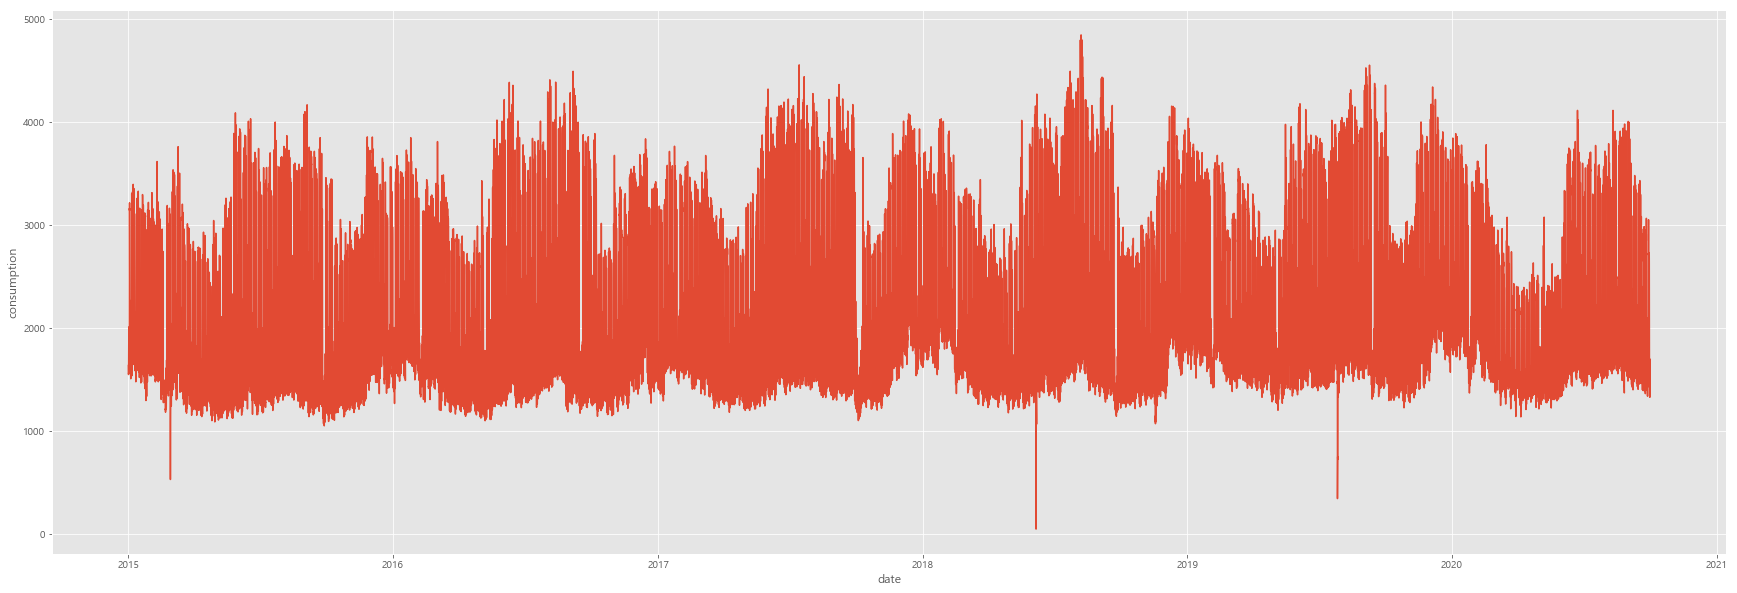

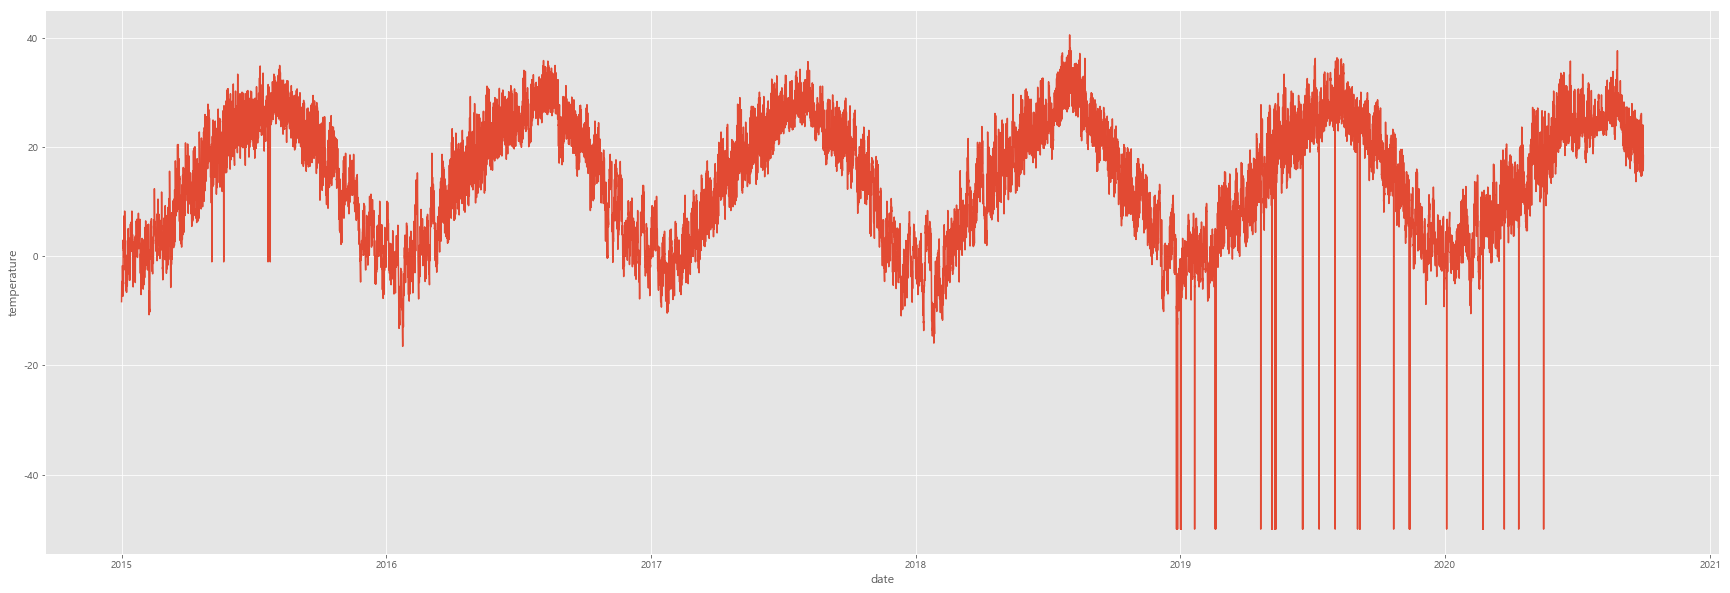

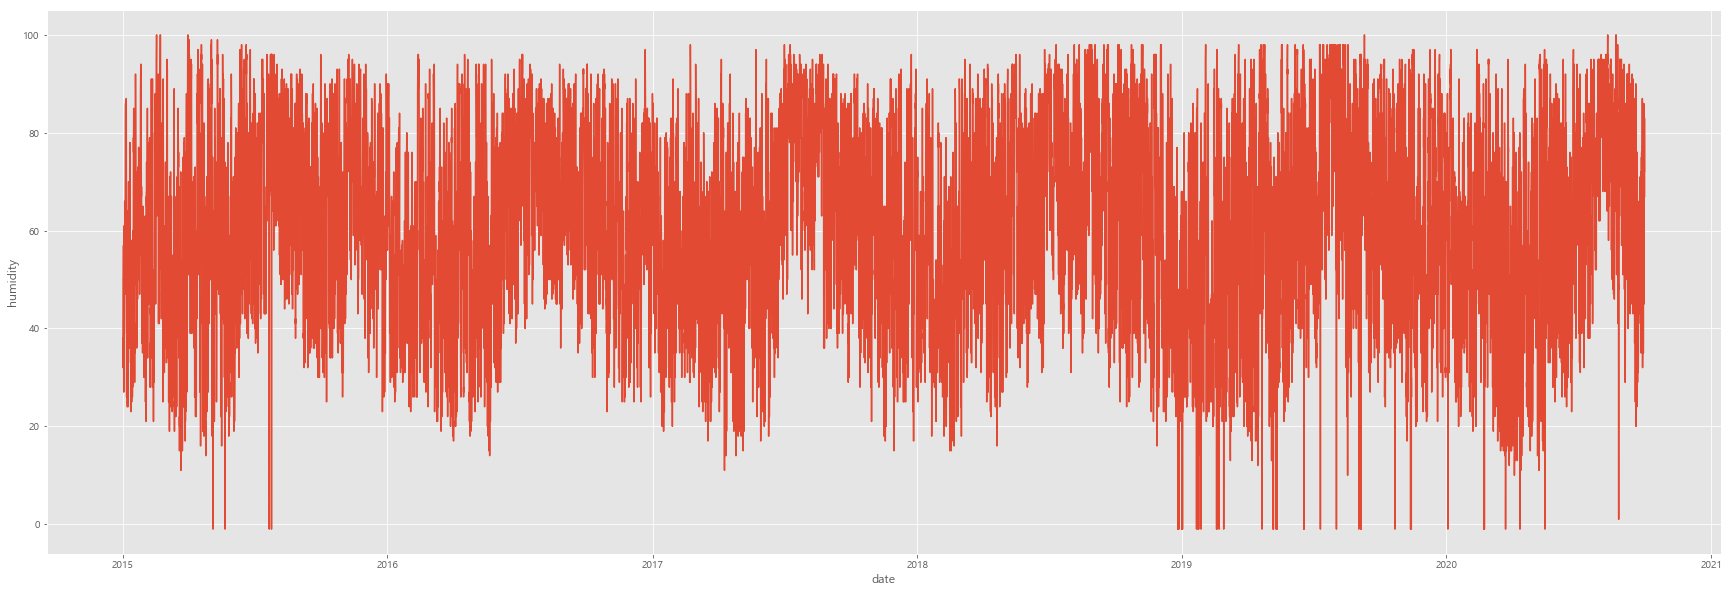

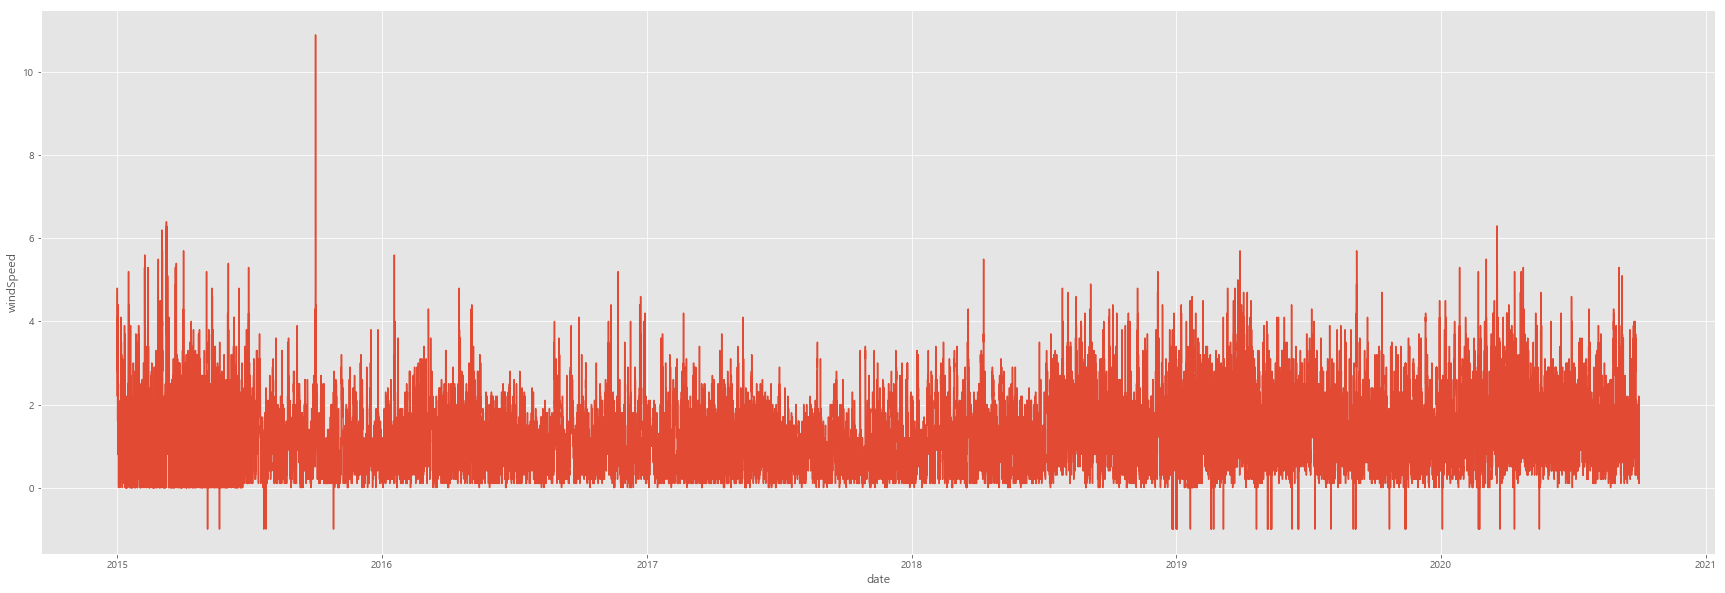

In [210]:
# plot consumpData before fixing 

# plot consumption
plt.figure(figsize=(30,10))
sns.lineplot(x=consumpData.index, y=consumpData['consumption'])

# plot temperature
plt.figure(figsize=(30,10))
sns.lineplot(x=consumpData.index, y=consumpData['temperature'])

# plot humidity
plt.figure(figsize=(30,10))
sns.lineplot(x=consumpData.index, y=consumpData['humidity'])

# plot windSpped
plt.figure(figsize=(30,10))
sns.lineplot(x=consumpData.index, y=consumpData['windSpeed'])

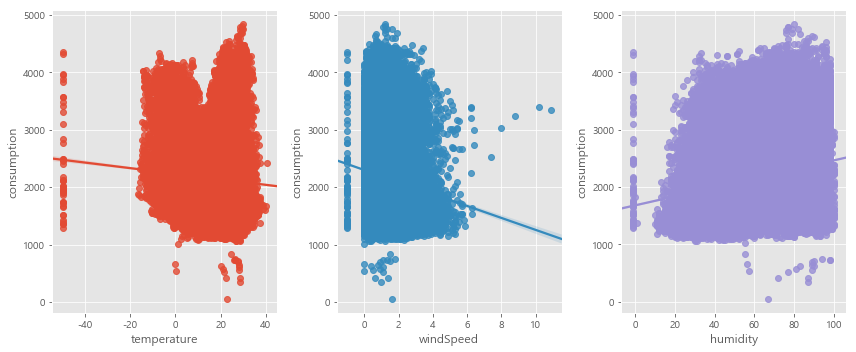

In [211]:
# check regplot before fixing 

figure, (ax1,ax2,ax3) = plt.subplots(ncols=3)
figure.set_size_inches(12,5)

sns.regplot(x='temperature',y='consumption', data=consumpData, ax=ax1)
sns.regplot(x='windSpeed',y='consumption', data=consumpData, ax=ax2)
sns.regplot(x='humidity',y='consumption', data=consumpData, ax=ax3)

figure.tight_layout()

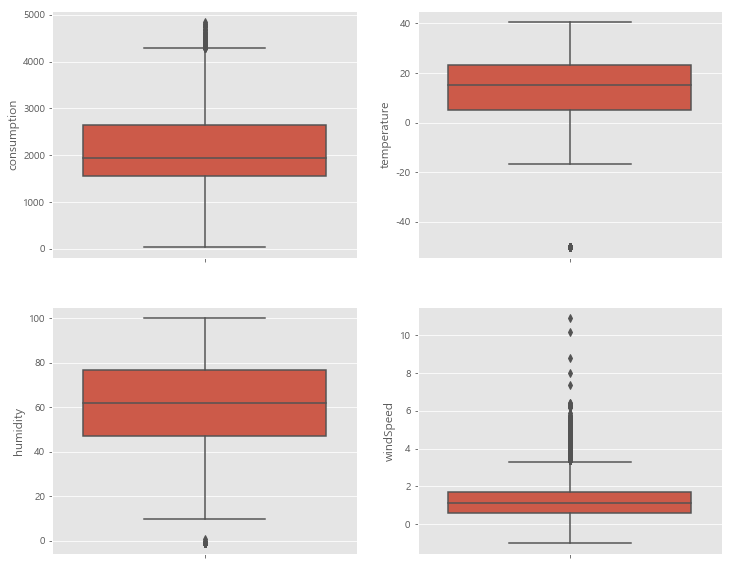

In [212]:
# check boxplot before fixing 

figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12,10)

sns.boxplot(data=consumpData, y='consumption', orient='v',ax=axes[0][0])
sns.boxplot(data=consumpData, y='temperature', orient='v',ax=axes[0][1])
sns.boxplot(data=consumpData, y='humidity', orient='v',ax=axes[1][0])
sns.boxplot(data=consumpData, y='windSpeed', orient='v',ax=axes[1][1])

## Fix Missing Value

In [227]:
# fix missing

consumpDataAfterFixMissing = consumpData

# fix temperature
consumpDataAfterFixMissing = consumpDataAfterFixMissing.replace({'temperature':-50},{'temperature':np.nan})

# fix humidity
consumpDataAfterFixMissing = consumpDataAfterFixMissing.replace({'humidity':-1},{'humidity':np.nan})

# fix temperature
consumpDataAfterFixMissing = consumpDataAfterFixMissing.replace({'windSpeed':-1},{'windSpeed':np.nan})

# consumpData=consumpData.interpolate()
consumpDataAfterFixMissing.isnull().sum()

consumption     0
temperature    44
humidity       57
windSpeed      65
weekday         0
isHoliday       0
dtype: int64

In [228]:
# interpolate missing value
consumpDataAfterFixMissing=consumpDataAfterFixMissing.interpolate()
consumpDataAfterFixMissing.isnull().sum()

consumption    0
temperature    0
humidity       0
windSpeed      0
weekday        0
isHoliday      0
dtype: int64

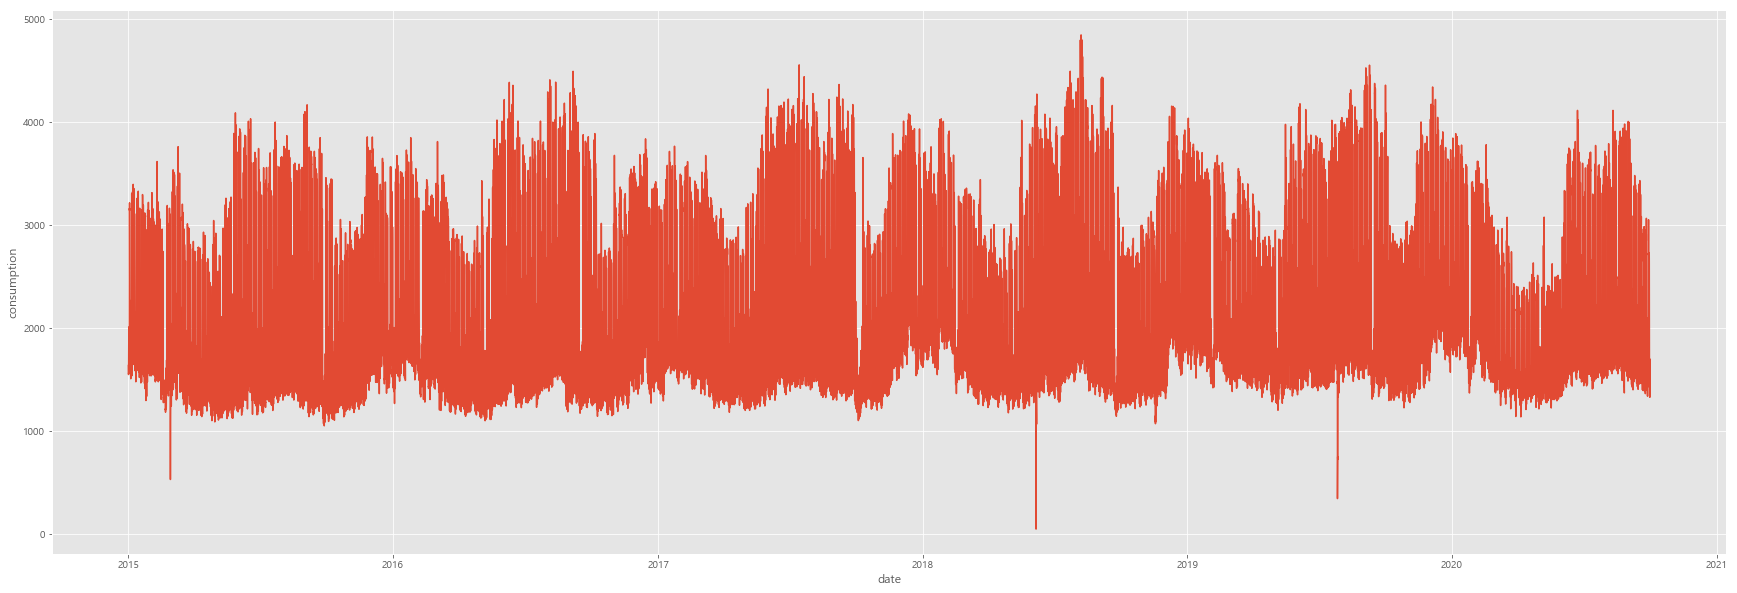

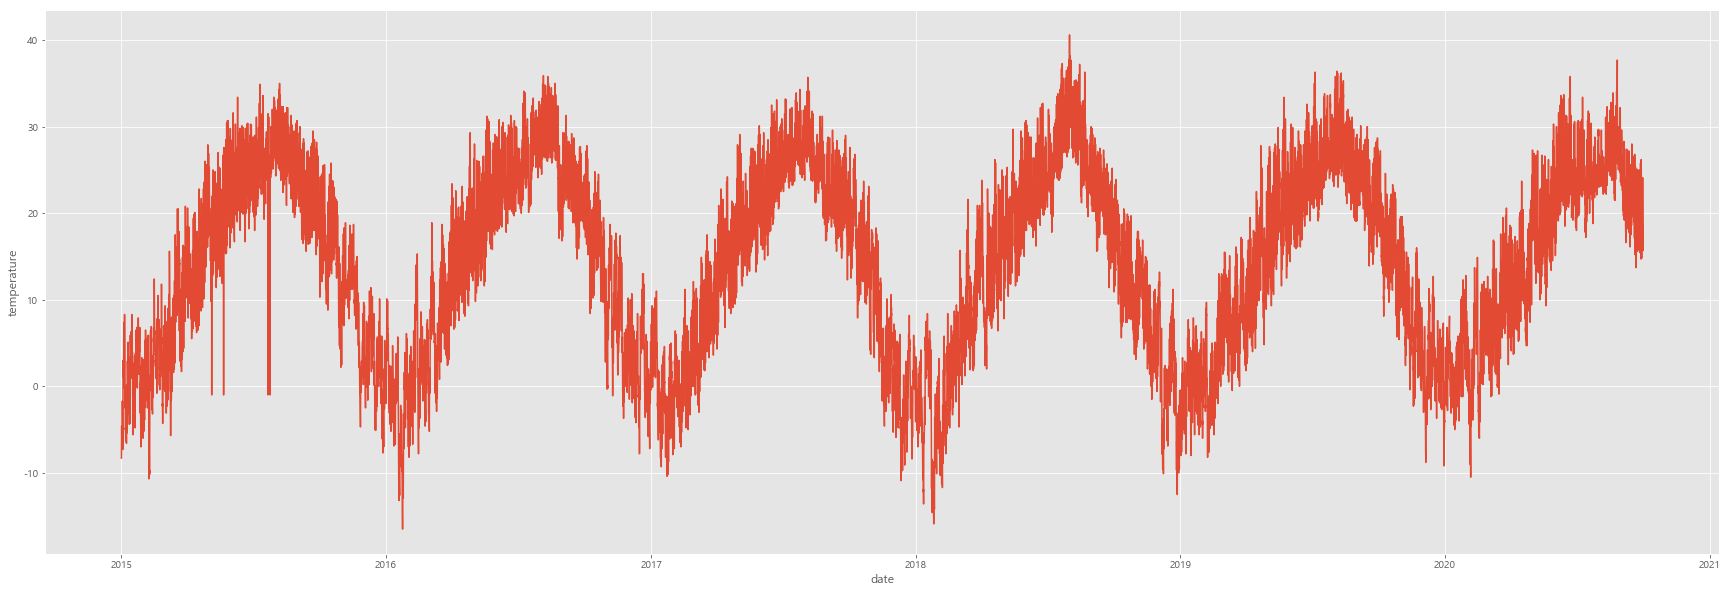

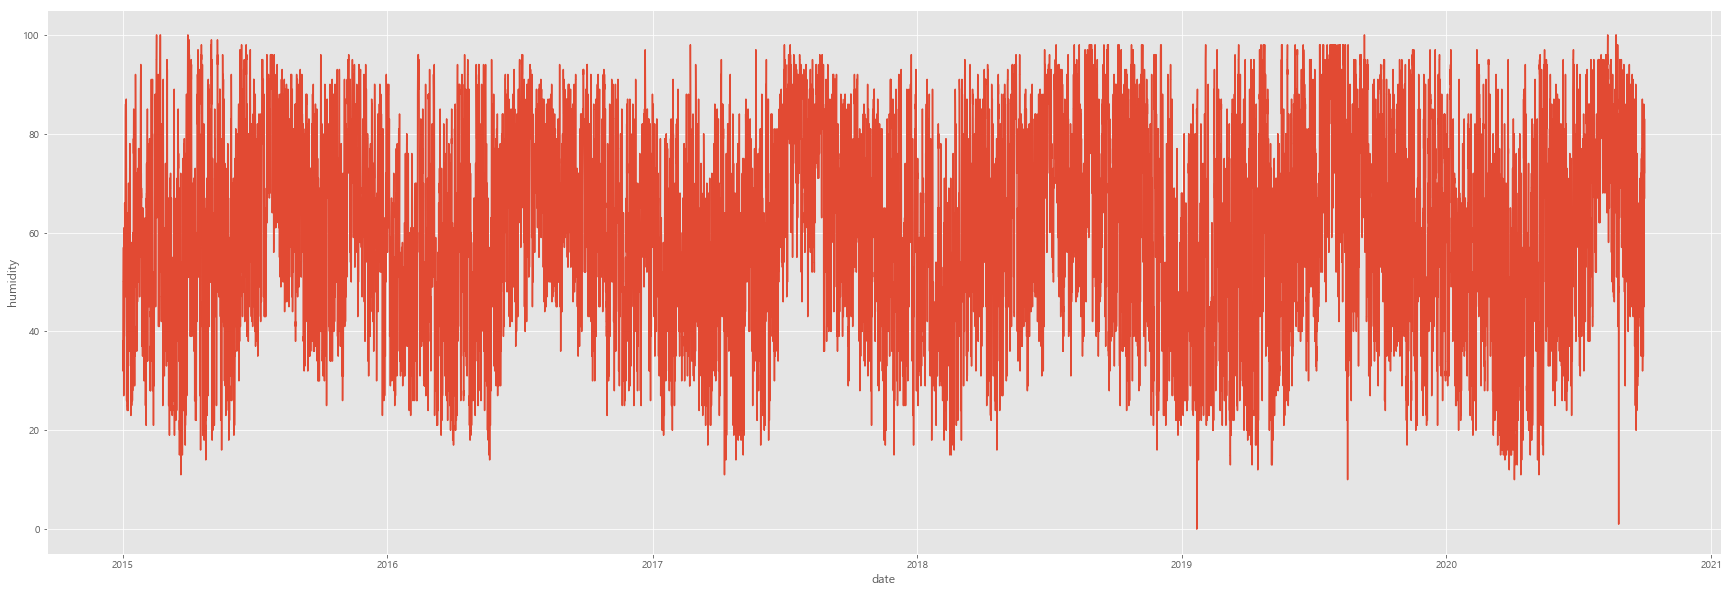

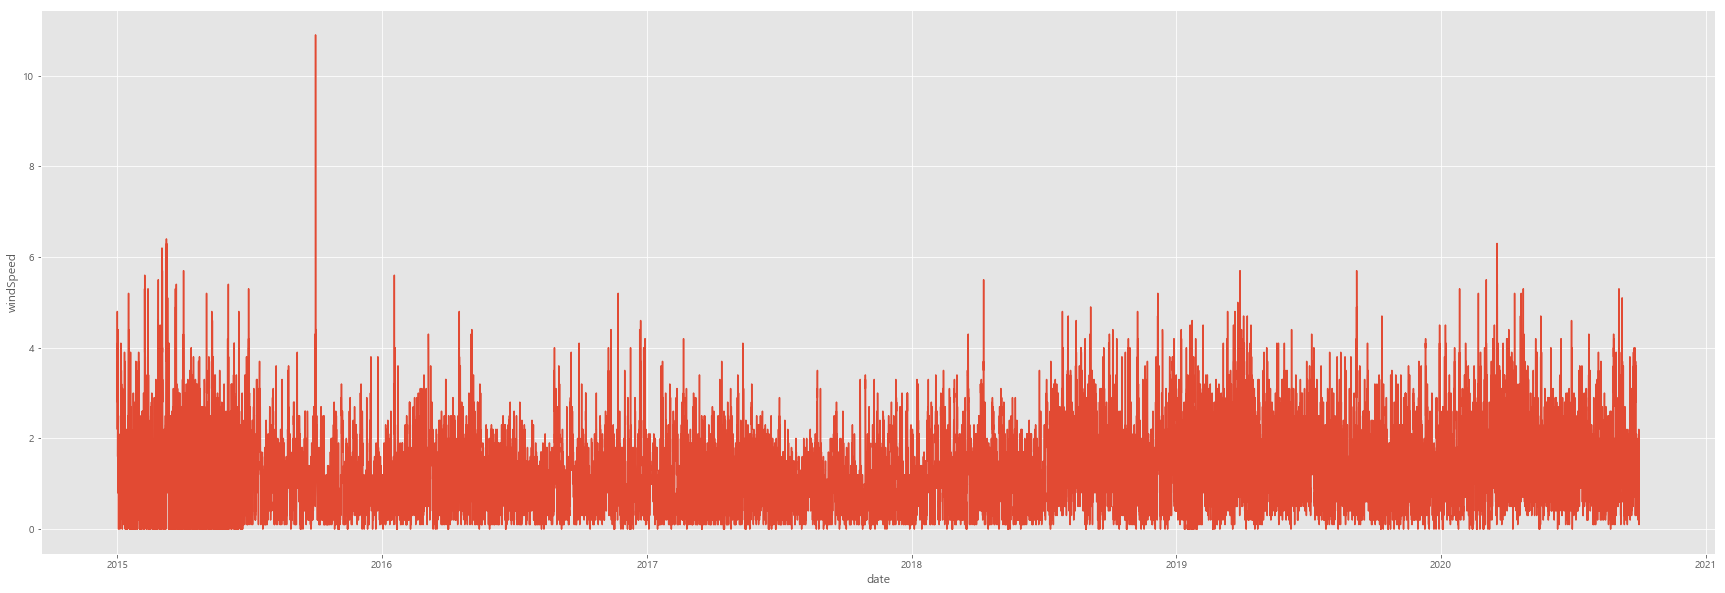

In [218]:
# plot consumpDataAfterFixMissing after fixing missing

# plot consumption
plt.figure(figsize=(30,10))
sns.lineplot(x=consumpDataAfterFixMissing.index, y=consumpDataAfterFixMissing['consumption'])

# plot temperature
plt.figure(figsize=(30,10))
sns.lineplot(x=consumpDataAfterFixMissing.index, y=consumpDataAfterFixMissing['temperature'])

# plot humidity
plt.figure(figsize=(30,10))
sns.lineplot(x=consumpDataAfterFixMissing.index, y=consumpDataAfterFixMissing['humidity'])

# plot windSpped
plt.figure(figsize=(30,10))
sns.lineplot(x=consumpDataAfterFixMissing.index, y=consumpDataAfterFixMissing['windSpeed'])

## Fix Outlier

In [231]:
# fix consumption outlier

consumpDataAfterFixOutlier = consumpDataAfterFixMissing

consumpDataAfterFixOutlier.loc[(consumpDataAfterFixOutlier.consumption < 1000),'consumption'] = np.nan


# fix consumpDataAfterFix temperature outlier in 2015

consumpDataAfterFixOutlier['2015-05':'2015-07'].loc[(consumpDataAfterFixOutlier.temperature < 0),'temperature'] = np.nan

# fix windSpeed outlier
consumpDataAfterFixOutlier.loc[(consumpDataAfterFixOutlier.windSpeed > 7),'windSpeed'] = np.nan

# fix humidity outlier

q1 = consumpDataAfterFixOutlier['humidity'].quantile(0.25)
q3 = consumpDataAfterFixOutlier['humidity'].quantile(0.75)
iqr = q3 - q1

consumpDataAfterFixOutlier.loc[(consumpDataAfterFixOutlier.humidity < q1-1.5*iqr),'humidity'] = np.nan

# interpolate temperature outlier
consumpDataAfterFixOutlier=consumpDataAfterFixOutlier.interpolate()
consumpDataAfterFixOutlier.isnull().sum()

consumption    0
temperature    0
humidity       0
windSpeed      0
weekday        0
isHoliday      0
dtype: int64

In [232]:
# set final Data after fixing
finalConsumpData = consumpDataAfterFixOutlier

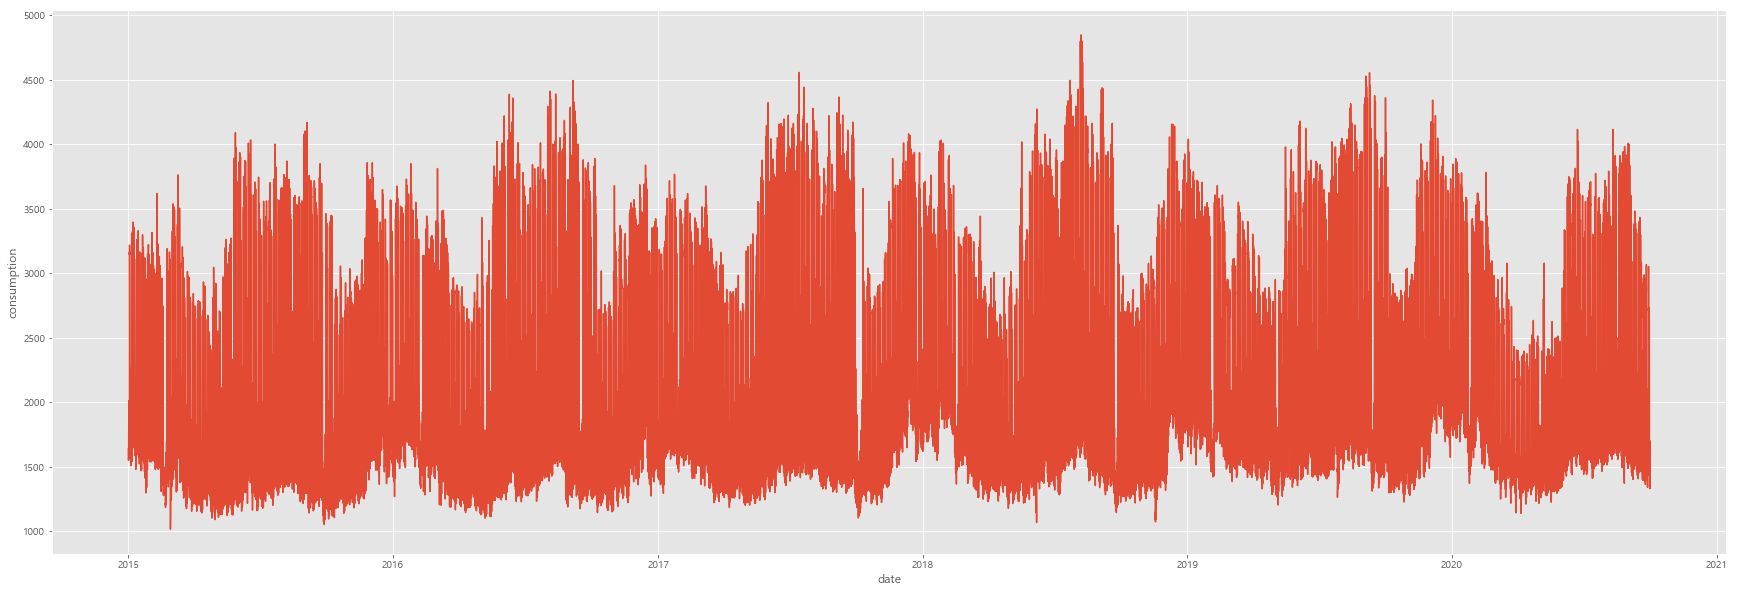

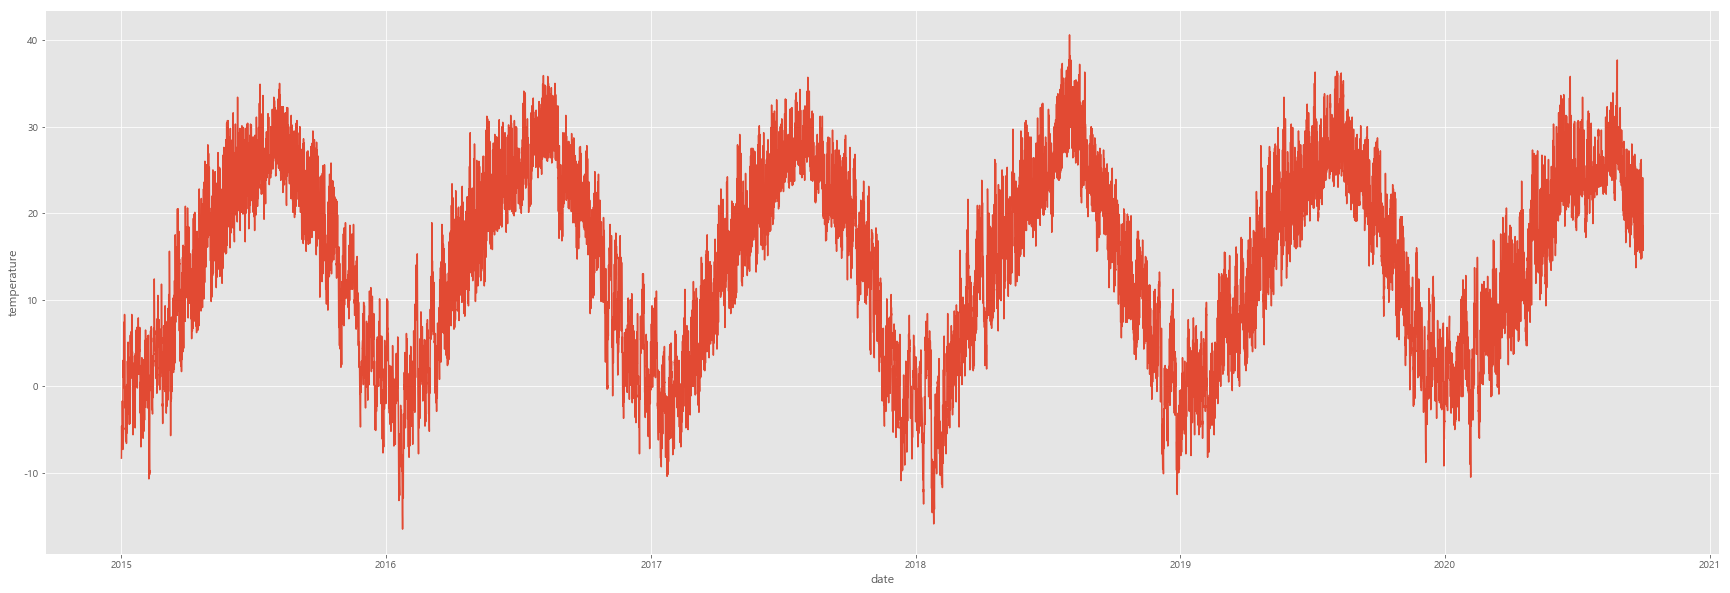

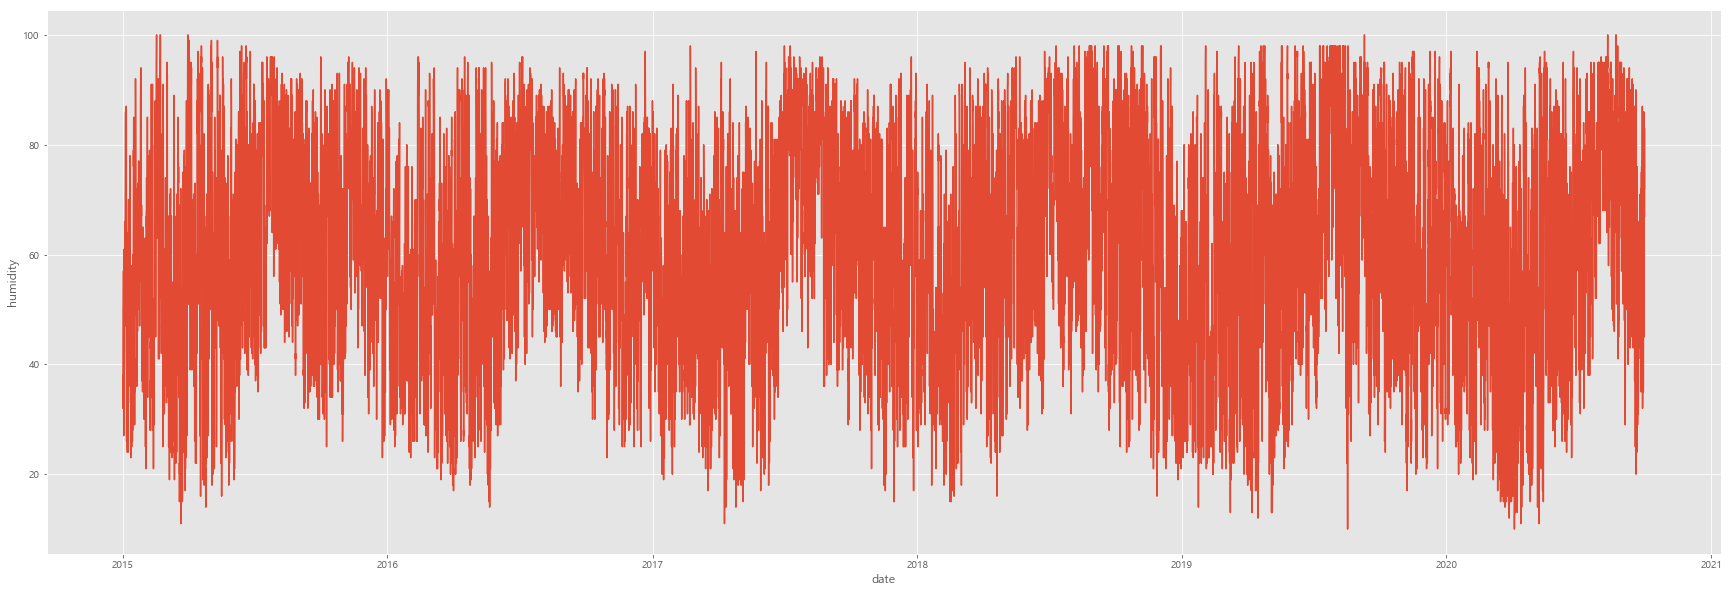

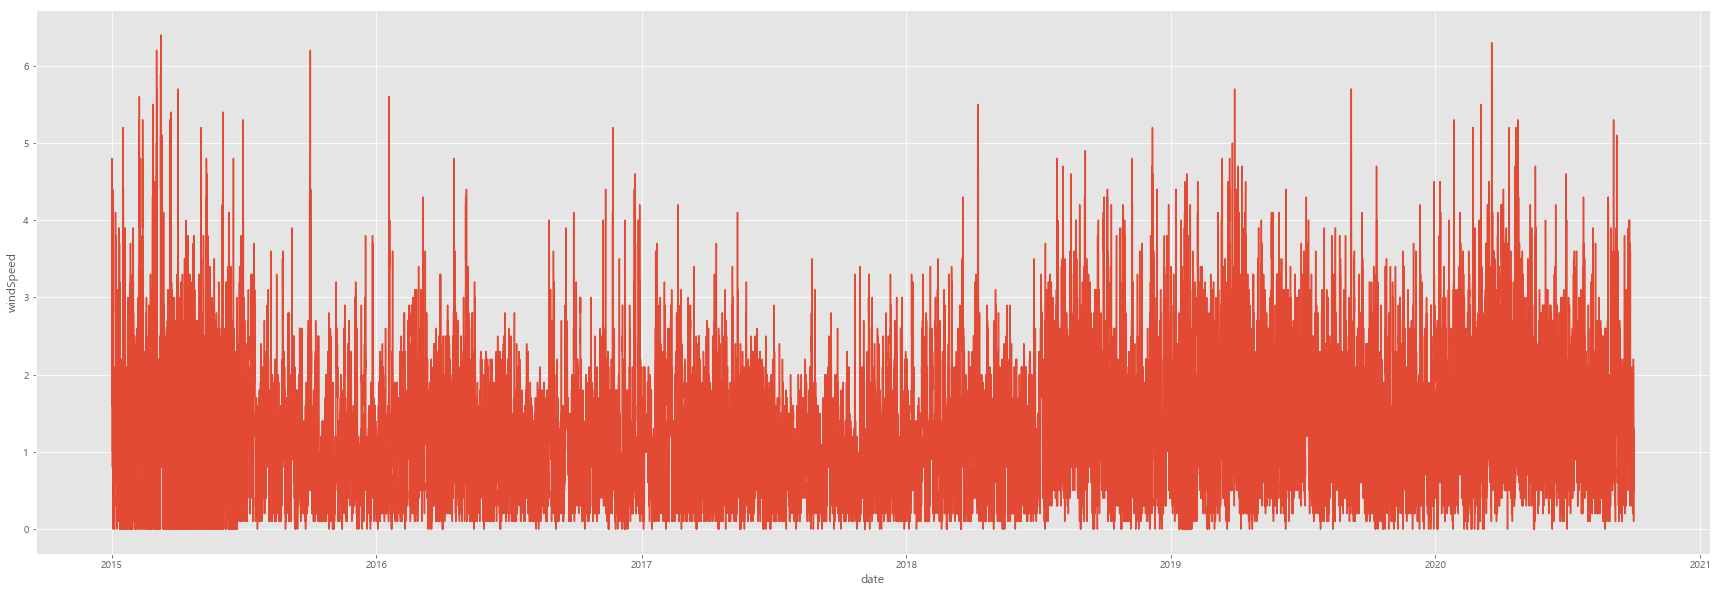

In [233]:
# plot consumpDataAfterFixMissing after fixing missing

# plot consumption
plt.figure(figsize=(30,10))
sns.lineplot(x=finalConsumpData.index, y=finalConsumpData['consumption'])

# plot temperature
plt.figure(figsize=(30,10))
sns.lineplot(x=finalConsumpData.index, y=finalConsumpData['temperature'])

# plot humidity
plt.figure(figsize=(30,10))
sns.lineplot(x=finalConsumpData.index, y=finalConsumpData['humidity'])

# plot windSpped
plt.figure(figsize=(30,10))
sns.lineplot(x=finalConsumpData.index, y=finalConsumpData['windSpeed'])

# After Fixing Missing Value and Outlier

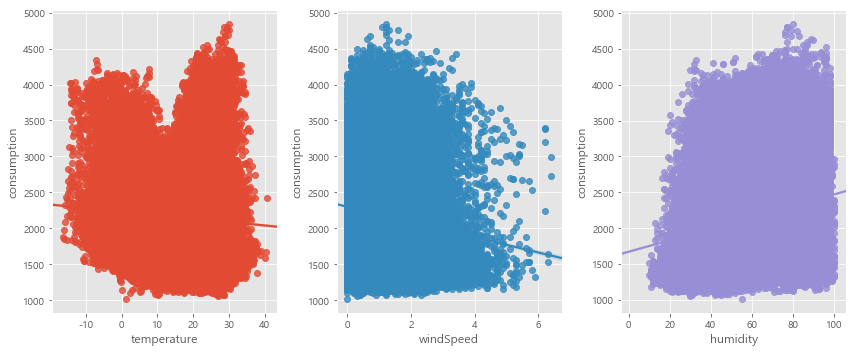

In [234]:
# check regplot after fixing data

figure, (ax1,ax2,ax3) = plt.subplots(ncols=3)
figure.set_size_inches(12,5)

sns.regplot(x='temperature',y='consumption', data=finalConsumpData, ax=ax1)
sns.regplot(x='windSpeed',y='consumption', data=finalConsumpData, ax=ax2)
sns.regplot(x='humidity',y='consumption', data=finalConsumpData, ax=ax3)

figure.tight_layout()

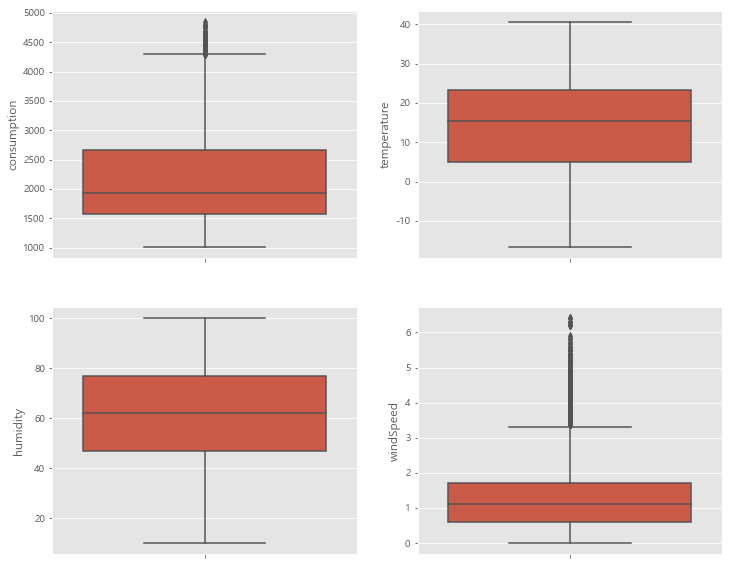

In [235]:
# plot boxplot

figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12,10)

sns.boxplot(data=finalConsumpData, y='consumption', orient='v',ax=axes[0][0])
sns.boxplot(data=finalConsumpData, y='temperature', orient='v',ax=axes[0][1])
sns.boxplot(data=finalConsumpData, y='humidity', orient='v',ax=axes[1][0])
sns.boxplot(data=finalConsumpData, y='windSpeed', orient='v',ax=axes[1][1])

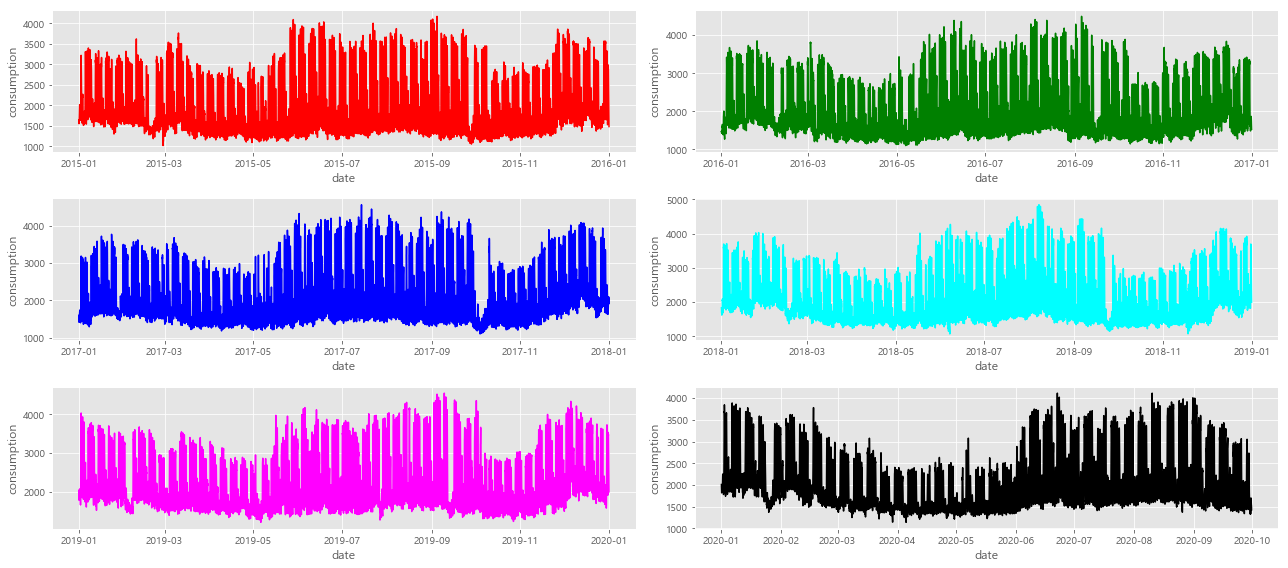

In [237]:
## plot consumption per year

figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(18,8)

# plt.rcParams['font.family'] = 'NanumGothic'

# sns.set(font="NanumGothic", 
#         rc={"axes.unicode_minus":False},
#         style='darkgrid')

sns.lineplot(x=finalConsumpData.loc['2015'].index, y=finalConsumpData['2015']['consumption'], ax=ax1, color='red')
sns.lineplot(x=finalConsumpData.loc['2016'].index, y=finalConsumpData['2016']['consumption'], ax=ax2, color='green')
sns.lineplot(x=finalConsumpData.loc['2017'].index, y=finalConsumpData['2017']['consumption'], ax=ax3, color='blue')
sns.lineplot(x=finalConsumpData.loc['2018'].index, y=finalConsumpData['2018']['consumption'], ax=ax4, color='cyan')
sns.lineplot(x=finalConsumpData.loc['2019'].index, y=finalConsumpData['2019']['consumption'], ax=ax5, color='magenta')
sns.lineplot(x=finalConsumpData.loc['2020'].index, y=finalConsumpData['2020']['consumption'], ax=ax6, color='black')

# plt.ylim(0,5000)
figure.tight_layout()

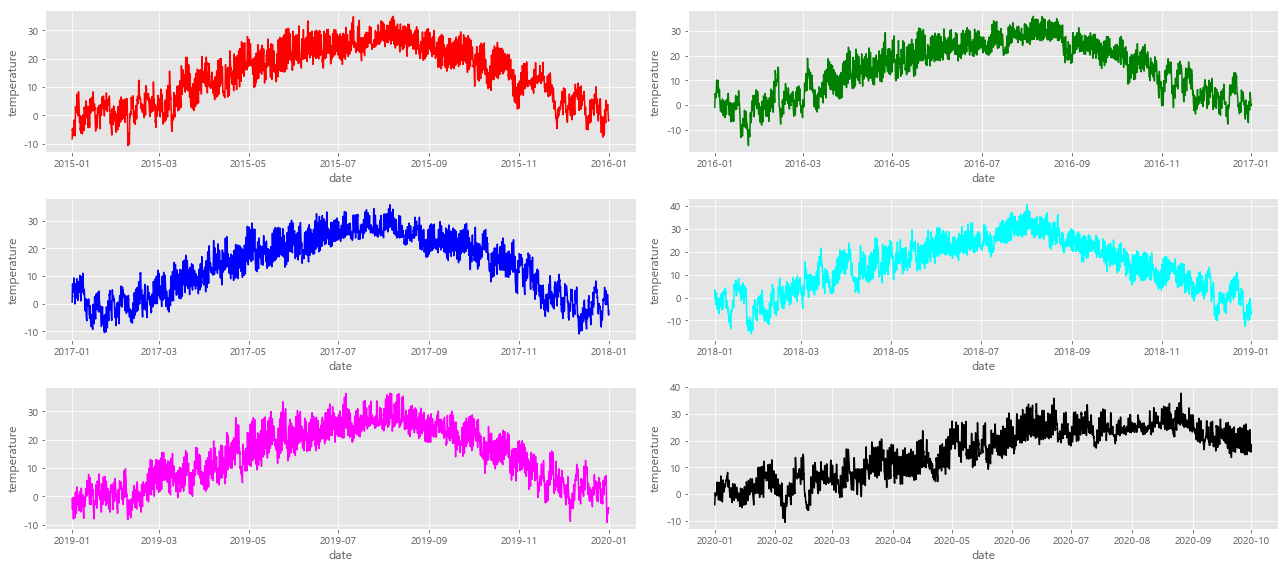

In [238]:
# plot temperature per year

figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(18,8)

# plt.rcParams['font.family'] = 'NanumGothic'

# sns.set(font="NanumGothic", 
#         rc={"axes.unicode_minus":False},
#         style='darkgrid')

sns.lineplot(x=finalConsumpData.loc['2015'].index, y=finalConsumpData['2015']['temperature'], ax=ax1, color='red')
sns.lineplot(x=finalConsumpData.loc['2016'].index, y=finalConsumpData['2016']['temperature'], ax=ax2, color='green')
sns.lineplot(x=finalConsumpData.loc['2017'].index, y=finalConsumpData['2017']['temperature'], ax=ax3, color='blue')
sns.lineplot(x=finalConsumpData.loc['2018'].index, y=finalConsumpData['2018']['temperature'], ax=ax4, color='cyan')
sns.lineplot(x=finalConsumpData.loc['2019'].index, y=finalConsumpData['2019']['temperature'], ax=ax5, color='magenta')
sns.lineplot(x=finalConsumpData.loc['2020'].index, y=finalConsumpData['2020']['temperature'], ax=ax6, color='black')

# plt.ylim(0,5000)
figure.tight_layout()

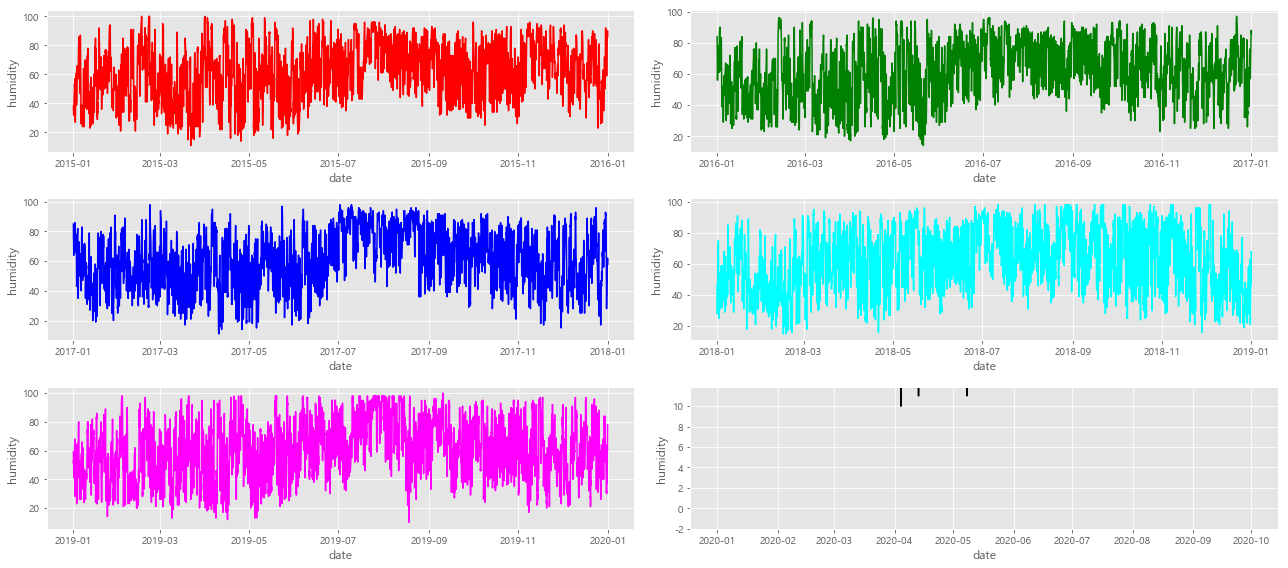

In [239]:
# plot humidity per year

figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(18,8)

# plt.rcParams['font.family'] = 'NanumGothic'

# sns.set(font="NanumGothic", 
#         rc={"axes.unicode_minus":False},
#         style='darkgrid')

plt.ylim(consumpData['windSpeed'].min()-1,consumpData['windSpeed'].max()+1)

sns.lineplot(x=finalConsumpData.loc['2015'].index, y=finalConsumpData['2015']['humidity'], ax=ax1, color='red')
sns.lineplot(x=finalConsumpData.loc['2016'].index, y=finalConsumpData['2016']['humidity'], ax=ax2, color='green')
sns.lineplot(x=finalConsumpData.loc['2017'].index, y=finalConsumpData['2017']['humidity'], ax=ax3, color='blue')
sns.lineplot(x=finalConsumpData.loc['2018'].index, y=finalConsumpData['2018']['humidity'], ax=ax4, color='cyan')
sns.lineplot(x=finalConsumpData.loc['2019'].index, y=finalConsumpData['2019']['humidity'], ax=ax5, color='magenta')
sns.lineplot(x=finalConsumpData.loc['2020'].index, y=finalConsumpData['2020']['humidity'], ax=ax6, color='black')

# plt.ylim(0,5000)
figure.tight_layout()

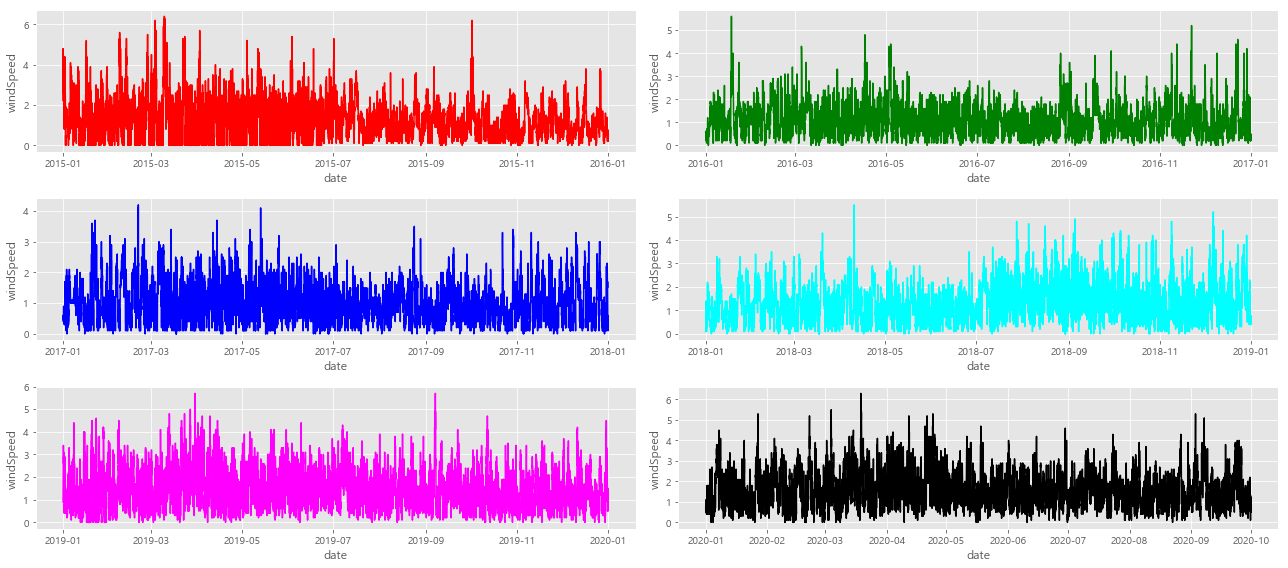

In [240]:
# plot windSpeed per year

figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(18,8)

# plt.rcParams['font.family'] = 'NanumGothic'

# sns.set(font="NanumGothic", 
#         rc={"axes.unicode_minus":False},
#         style='darkgrid')

# plt.ylim(consumpData['windSpeed'].min()-1,consumpData['windSpeed'].max()+1)


sns.lineplot(x=finalConsumpData.loc['2015'].index, y=finalConsumpData['2015']['windSpeed'], ax=ax1, color='red')
sns.lineplot(x=finalConsumpData.loc['2016'].index, y=finalConsumpData['2016']['windSpeed'], ax=ax2, color='green')
sns.lineplot(x=finalConsumpData.loc['2017'].index, y=finalConsumpData['2017']['windSpeed'], ax=ax3, color='blue')
sns.lineplot(x=finalConsumpData.loc['2018'].index, y=finalConsumpData['2018']['windSpeed'], ax=ax4, color='cyan')
sns.lineplot(x=finalConsumpData.loc['2019'].index, y=finalConsumpData['2019']['windSpeed'], ax=ax5, color='magenta')
sns.lineplot(x=finalConsumpData.loc['2020'].index, y=finalConsumpData['2020']['windSpeed'], ax=ax6, color='black')

figure.tight_layout()

# Save Data to Train Data

In [241]:
# save consumpData to training data
finalConsumpData.to_excel('sejong_power_consumption_per_hour_train_data.xlsx',index = True,index_label='date')

# Read Train Data

In [49]:
# read train Data
train= pd.read_excel('sejong_power_consumption_per_hour_train_data.xlsx', index=True,index_col='date' ,sheet_name ="Sheet1" )
train

consumption  temperature  humidity  windSpeed  weekday  \
date                                                                          
2015-01-01 00:00:00      1638.36    -8.300000      38.0        4.0        3   
2015-01-01 01:00:00      1603.80    -8.200000      37.0        4.8        3   
2015-01-01 02:00:00      1578.24    -7.000000      34.0        2.6        3   
2015-01-01 03:00:00      1561.68    -6.200000      32.0        2.8        3   
2015-01-01 04:00:00      1550.52    -5.000000      32.0        2.2        3   
2015-01-01 05:00:00      1564.20    -5.300000      32.0        4.1        3   
2015-01-01 06:00:00      1562.40    -4.700000      33.0        3.5        3   
2015-01-01 07:00:00      1631.16    -4.600000      34.0        3.0        3   
2015-01-01 08:00:00      1759.68    -4.900000      37.0        3.3        3   
2015-01-01 09:00:00      1854.72    -5.000000      40.0        2.8        3   
2015-01-01 10:00:00      1884.96    -5.500000      42.0        3.5        3   
2015-01-01 11:00:00      1894.68    -6.200000      44.0        3.7        3   
2015-01-01 12:00:00      1915.92    -6.500000      45.0        1.6        3   
2015-01-01 13:00:00      1968.84    -6.600000      46.0        2.6        3   
2015-01-01 14:00:00      2011.68    -6.900000      47.0        2.8        3   
2015-01-01 15:00:00      1914.84    -7.100000      48.0        2.4        3   
2015-01-01 16:00:00      1932.48    -7.000000      50.0        2.5        3   
2015-01-01 17:00:00      1898.64    -6.300000      50.0        0.9        3   
2015-01-01 18:00:00      1960.92    -6.100000      53.0        0.8        3   
2015-01-01 19:00:00      1942.56    -6.600000      52.0        1.3        3   
2015-01-01 20:00:00      1911.24    -6.700000      53.0        0.9        3   
2015-01-01 21:00:00      1883.52    -6.400000      52.0        2.4        3   
2015-01-01 22:00:00      1828.44    -6.200000      54.0        2.2        3   
2015-01-01 23:00:00      1754.64    -7.200000      57.0        1.3        3   
2015-01-02 00:00:00      1735.56    -6.300000      57.0        1.0        4   
2015-01-02 01:00:00      1681.56    -5.200000      51.0        1.3        4   
2015-01-02 02:00:00      1668.24    -4.200000      39.0        2.6        4   
2015-01-02 03:00:00      1634.04    -3.600000      36.0        4.4        4   
2015-01-02 04:00:00      1639.80    -2.800000      34.0        3.2        4   
2015-01-02 05:00:00      1706.76    -2.200000      30.0        3.1        4   
...                          ...          ...       ...        ...      ...   
2020-09-29 18:00:00      2019.36    16.299999      84.0        0.5        1   
2020-09-29 19:00:00      1839.84    16.100000      86.0        1.1        1   
2020-09-29 20:00:00      1732.32    16.000000      85.0        0.6        1   
2020-09-29 21:00:00      1632.48    16.200001      84.0        1.0        1   
2020-09-29 22:00:00      1539.36    16.900000      80.0        1.5        1   
2020-09-29 23:00:00      1481.76    18.200001      74.0        1.1        1   
2020-09-30 00:00:00      1443.36    19.700001      65.0        1.1        2   
2020-09-30 01:00:00      1423.20    21.299999      58.0        1.3        2   
2020-09-30 02:00:00      1388.16    22.900000      50.0        0.7        2   
2020-09-30 03:00:00      1404.00    24.000000      45.0        1.4        2   
2020-09-30 04:00:00      1346.88    24.100000      46.0        1.2        2   
2020-09-30 05:00:00      1331.52    23.200001      48.0        1.3        2   
2020-09-30 06:00:00      1350.24    22.900000      53.0        1.3        2   
2020-09-30 07:00:00      1347.36    21.900000      58.0        0.7        2   
2020-09-30 08:00:00      1439.52    21.400000      60.0        2.1        2   
2020-09-30 09:00:00      1441.44    19.900000      73.0        1.4        2   
2020-09-30 10:00:00      1367.04    18.400000      82.0        1.0        2   
2020-09-30 11:00:00      1332.00    18.500000      76.0        2.2     

In [50]:
# consumption Data Shape
train.shape

(50400, 6)

In [51]:
# consumpData info
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50400 entries, 2015-01-01 00:00:00 to 2020-09-30 23:00:00
Data columns (total 6 columns):
consumption    50400 non-null float64
temperature    50400 non-null float64
humidity       50400 non-null float64
windSpeed      50400 non-null float64
weekday        50400 non-null int64
isHoliday      50400 non-null int64
dtypes: float64(4), int64(2)
memory usage: 2.7 MB


In [52]:
train.head(20)

consumption  temperature  humidity  windSpeed  weekday  \
date                                                                          
2015-01-01 00:00:00      1638.36         -8.3      38.0        4.0        3   
2015-01-01 01:00:00      1603.80         -8.2      37.0        4.8        3   
2015-01-01 02:00:00      1578.24         -7.0      34.0        2.6        3   
2015-01-01 03:00:00      1561.68         -6.2      32.0        2.8        3   
2015-01-01 04:00:00      1550.52         -5.0      32.0        2.2        3   
2015-01-01 05:00:00      1564.20         -5.3      32.0        4.1        3   
2015-01-01 06:00:00      1562.40         -4.7      33.0        3.5        3   
2015-01-01 07:00:00      1631.16         -4.6      34.0        3.0        3   
2015-01-01 08:00:00      1759.68         -4.9      37.0        3.3        3   
2015-01-01 09:00:00      1854.72         -5.0      40.0        2.8        3   
2015-01-01 10:00:00      1884.96         -5.5      42.0        3.5        3   
2015-01-01 11:00:00      1894.68         -6.2      44.0        3.7        3   
2015-01-01 12:00:00      1915.92         -6.5      45.0        1.6        3   
2015-01-01 13:00:00      1968.84         -6.6      46.0        2.6        3   
2015-01-01 14:00:00      2011.68         -6.9      47.0        2.8        3   
2015-01-01 15:00:00      1914.84         -7.1      48.0        2.4        3   
2015-01-01 16:00:00      1932.48         -7.0      50.0        2.5        3   
2015-01-01 17:00:00      1898.64         -6.3      50.0        0.9        3   
2015-01-01 18:00:00      1960.92         -6.1      53.0        0.8        3   
2015-01-01 19:00:00      1942.56         -6.6      52.0        1.3        3   

                     isHoliday  
date                            
2015-01-01 00:00:00          1  
2015-01-01 01:00:00          1  
2015-01-01 02:00:00          1  
2015-01-01 03:00:00          1  
2015-01-01 04:00:00          1  
2015-01-01 05:00:00          1  
2015-01-01 06:00:00          1  
2015-01-01 07:00:00          1  
2015-01-01 08:00:00          1  
2015-01-01 09:00:00          1  
2015-01-01 10:00:00          1  
2015-01-01 11:00:00          1  
2015-01-01 12:00:00          1  
2015-01-01 13:00:00          1  
2015-01-01 14:00:00          1  
2015-01-01 15:00:00          1  
2015-01-01 16:00:00          1  
2015-01-01 17:00:00          1  
2015-01-01 18:00:00          1  
2015-01-01 19:00:00          1

In [53]:
# consumpData describe
train.describe()

consumption   temperature      humidity     windSpeed      weekday  \
count  50400.000000  50400.000000  50400.000000  50400.000000  50400.00000   
mean    2165.332392     14.179569     61.684246      1.271207      3.00000   
std      744.456640     10.604296     19.169770      0.830968      2.00002   
min     1017.360000    -16.500000     10.000000      0.000000      0.00000   
25%     1563.840000      5.100000     47.000000      0.600000      1.00000   
50%     1933.320000     15.400000     62.000000      1.100000      3.00000   
75%     2655.450000     23.200001     77.000000      1.700000      5.00000   
max     4845.960000     40.599998    100.000000      6.400000      6.00000   

          isHoliday  
count  50400.000000  
mean       0.320952  
std        0.466847  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [54]:
# check is null consumpData
train.isnull().sum()

consumption    0
temperature    0
humidity       0
windSpeed      0
weekday        0
isHoliday      0
dtype: int64

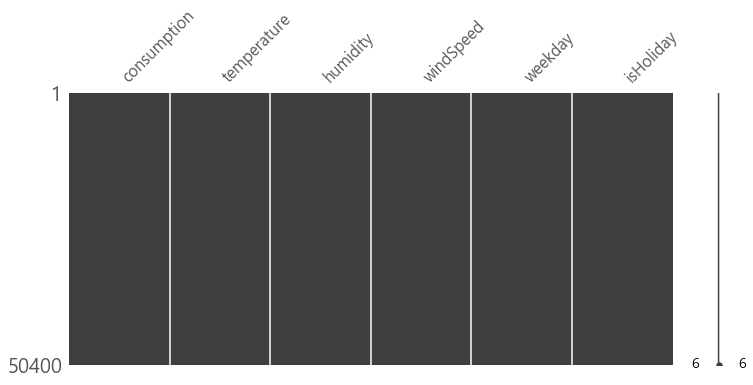

In [55]:
# 결측치를 시각화하는 모듈 missingno
import missingno as msno

msno.matrix(train,figsize=(12,5))

In [56]:
# devide datetime

date = train.index

train['year'] = date.year
train['month'] = date.month
train['day'] = date.day
train['hour'] = date.hour
# train['minute'] = date.minute
# train['second'] = date.second
train.shape

(50400, 10)

In [57]:
train.head()

consumption  temperature  humidity  windSpeed  weekday  \
date                                                                          
2015-01-01 00:00:00      1638.36         -8.3      38.0        4.0        3   
2015-01-01 01:00:00      1603.80         -8.2      37.0        4.8        3   
2015-01-01 02:00:00      1578.24         -7.0      34.0        2.6        3   
2015-01-01 03:00:00      1561.68         -6.2      32.0        2.8        3   
2015-01-01 04:00:00      1550.52         -5.0      32.0        2.2        3   

                     isHoliday  year  month  day  hour  
date                                                    
2015-01-01 00:00:00          1  2015      1    1     0  
2015-01-01 01:00:00          1  2015      1    1     1  
2015-01-01 02:00:00          1  2015      1    1     2  
2015-01-01 03:00:00          1  2015      1    1     3  
2015-01-01 04:00:00          1  2015      1    1     4

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50400 entries, 2015-01-01 00:00:00 to 2020-09-30 23:00:00
Data columns (total 10 columns):
consumption    50400 non-null float64
temperature    50400 non-null float64
humidity       50400 non-null float64
windSpeed      50400 non-null float64
weekday        50400 non-null int64
isHoliday      50400 non-null int64
year           50400 non-null int64
month          50400 non-null int64
day            50400 non-null int64
hour           50400 non-null int64
dtypes: float64(4), int64(6)
memory usage: 4.2 MB


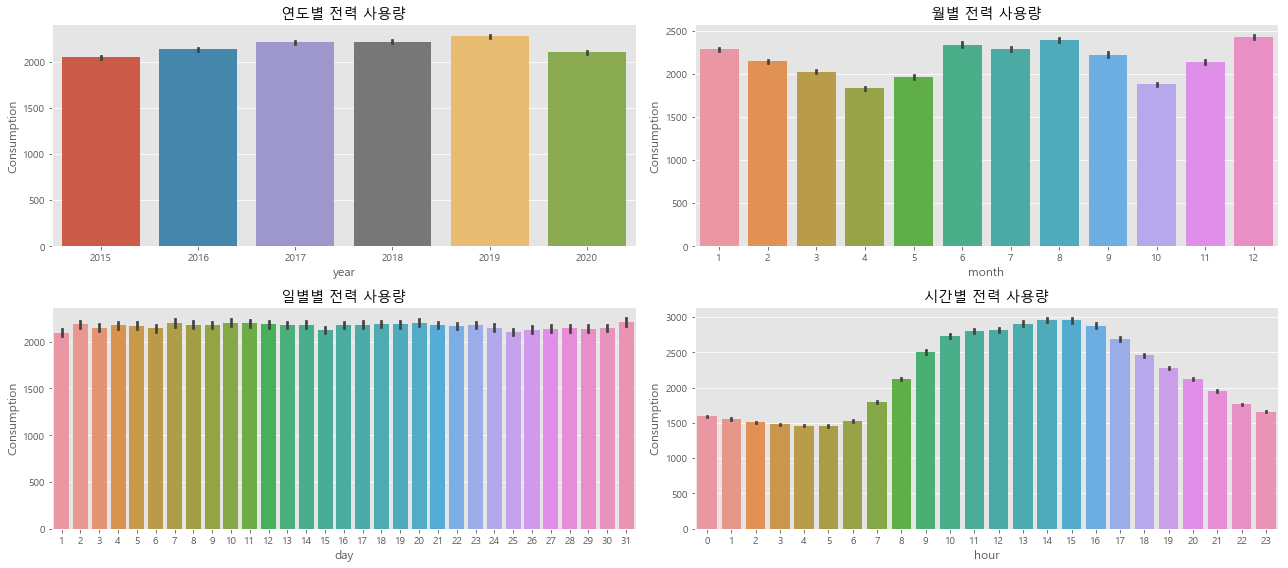

In [59]:
import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)


figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(18,8)

# plt.rcParams['font.family'] = 'NanumGothic'

# sns.set(font="NanumGothic", 
#         rc={"axes.unicode_minus":False},
#         style='darkgrid')

sns.barplot(data = train,x='year',y='consumption', ax=ax1)
sns.barplot(data = train,x='month',y='consumption',ax=ax2)
sns.barplot(data = train,x='day',y='consumption', ax=ax3)
sns.barplot(data = train,x='hour',y='consumption', ax=ax4)
# sns.barplot(data = train,x='minute',y='consumption', ax=ax5)
# sns.barplot(data = train,x='second',y='consumption', ax=ax6)

ax1.set(ylabel='Consumption', title = '연도별 전력 사용량')
ax2.set(ylabel='Consumption', title = '월별 전력 사용량')
ax3.set(ylabel='Consumption', title = '일별별 전력 사용량')
ax4.set(ylabel='Consumption', title = '시간별 전력 사용량')

figure.tight_layout()


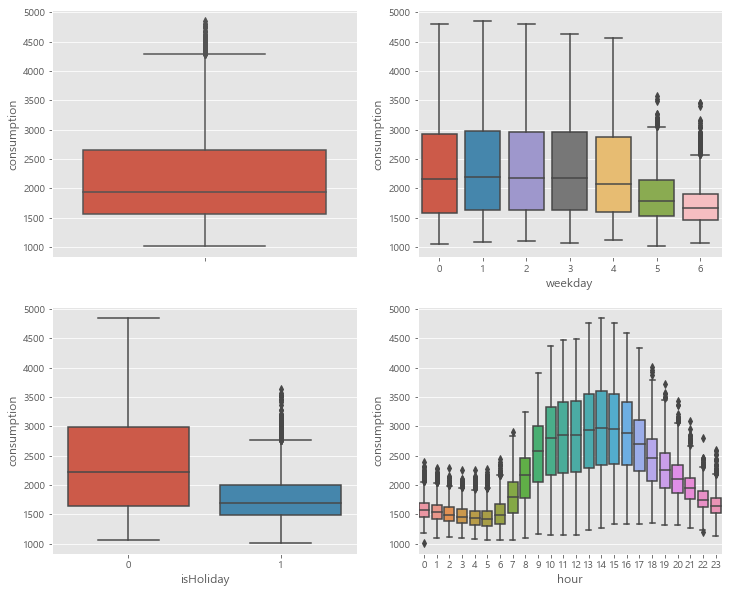

In [60]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12,10)

sns.boxplot(data=train, y='consumption', orient='v',ax=axes[0][0])
sns.boxplot(data=train, y='consumption', x='weekday', orient='v',ax=axes[0][1])
sns.boxplot(data=train, y='consumption', x='isHoliday', orient='v',ax=axes[1][0])
sns.boxplot(data=train, y='consumption', x='hour', orient='v',ax=axes[1][1])

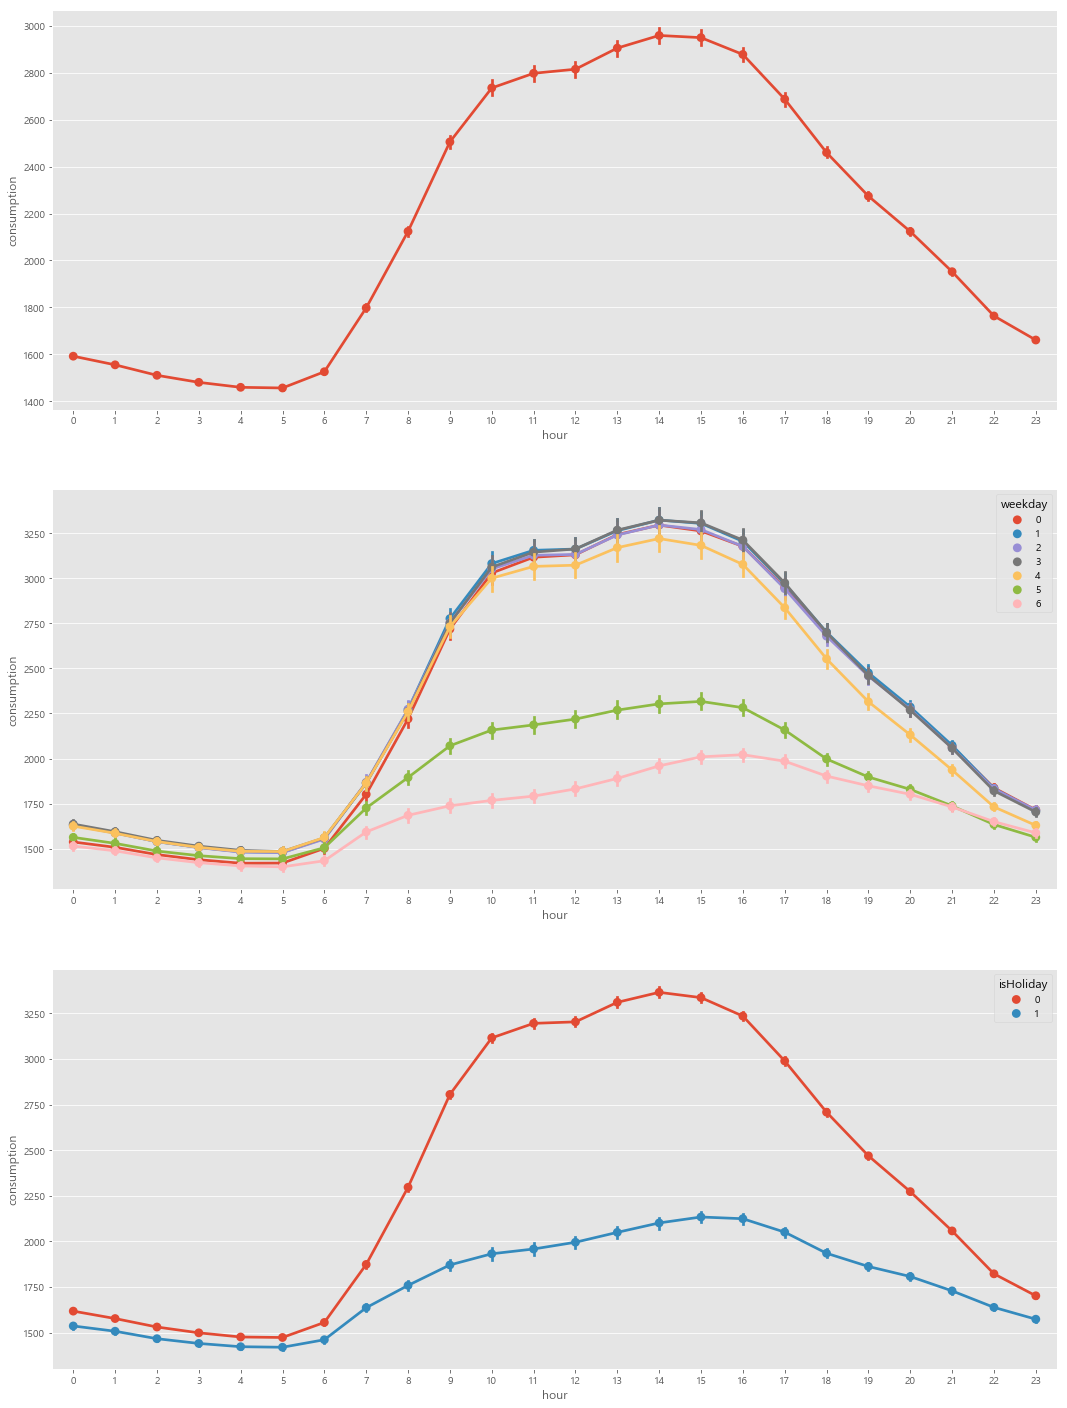

In [61]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3)
figure.set_size_inches(18,25)

sns.pointplot(data=train,x='hour', y='consumption',ax=ax1)
sns.pointplot(data=train,x='hour', y='consumption',hue='weekday', ax=ax2)
sns.pointplot(data=train,x='hour', y='consumption',hue='isHoliday', ax=ax3)


In [62]:
corrMatt = train[['consumption','temperature','humidity','windSpeed','weekday','isHoliday']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False

             consumption  temperature  humidity  windSpeed   weekday  \
consumption     1.000000    -0.069104  0.205252  -0.118150 -0.270112   
temperature    -0.069104     1.000000  0.174639   0.027881  0.006645   
humidity        0.205252     0.174639  1.000000  -0.312139  0.011314   
windSpeed      -0.118150     0.027881 -0.312139   1.000000 -0.017548   
weekday        -0.270112     0.006645  0.011314  -0.017548  1.000000   
isHoliday      -0.367779     0.001278  0.018111  -0.031806  0.720647   

             isHoliday  
consumption  -0.367779  
temperature   0.001278  
humidity      0.018111  
windSpeed    -0.031806  
weekday       0.720647  
isHoliday     1.000000  


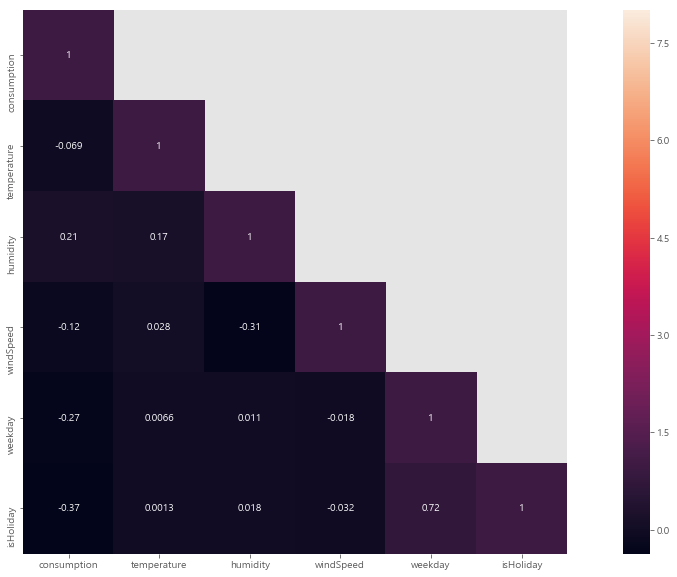

In [63]:
figure, ax = plt.subplots()
figure.set_size_inches(20,10)
sns.heatmap(corrMatt,mask = mask, vmax = 8, square = True, annot = True)

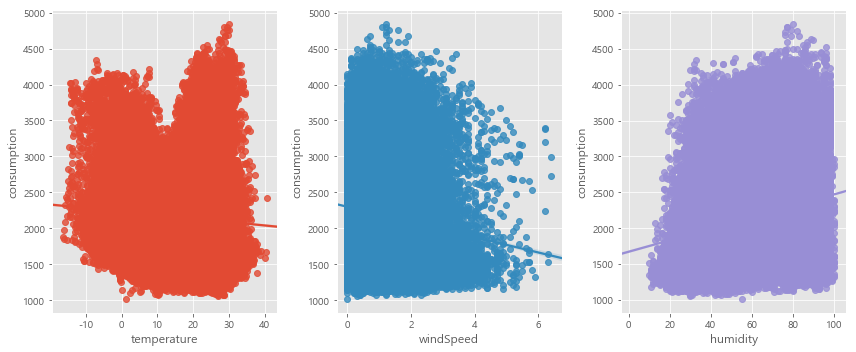

In [64]:
figure, (ax1,ax2,ax3) = plt.subplots(ncols=3)
figure.set_size_inches(12,5)

sns.regplot(x='temperature',y='consumption', data=train, ax=ax1)
sns.regplot(x='windSpeed',y='consumption', data=train, ax=ax2)
sns.regplot(x='humidity',y='consumption', data=train, ax=ax3)

figure.tight_layout()


In [65]:
# figure, axes = plt.subplots(nrows=2)
# figure.set_size_inches(18,10)

# plt.sca(axes[0])
# plt.xticks(rotation=30,ha='right')
# axes[0].set(ylabel='count')
# sns.countplot(data=train,x='windSpeed',ax=axes[0])


# plt.sca(axes[1])
# plt.xticks(rotation=30,ha='right')
# axes[1].set(ylabel='count')
# sns.countplot(data=train,x='humidity',ax=axes[1])

# figure.tight_layout()


# Add Columns a Day Ago Consumption and Two Day Ago

### 정확한 예측 모델 학습을 위해 전력 사용량 동향을 반영하는 하루, 이틀 전 전력사용량 데이터를 입력 변수로 활용

In [66]:
index = train.index

# a Day Ago
aDayAgoConsumption = pd.DataFrame(data=None, index=index-dt.timedelta(days=1), columns=None, dtype=float, copy=False)
aDayAgoConsumption['consumption'] = train['consumption']
aDayAgoConsumption.index = aDayAgoConsumption.index+dt.timedelta(days=1)
aDayAgoConsumption

consumption
date                            
2015-01-01 00:00:00          NaN
2015-01-01 01:00:00          NaN
2015-01-01 02:00:00          NaN
2015-01-01 03:00:00          NaN
2015-01-01 04:00:00          NaN
2015-01-01 05:00:00          NaN
2015-01-01 06:00:00          NaN
2015-01-01 07:00:00          NaN
2015-01-01 08:00:00          NaN
2015-01-01 09:00:00          NaN
2015-01-01 10:00:00          NaN
2015-01-01 11:00:00          NaN
2015-01-01 12:00:00          NaN
2015-01-01 13:00:00          NaN
2015-01-01 14:00:00          NaN
2015-01-01 15:00:00          NaN
2015-01-01 16:00:00          NaN
2015-01-01 17:00:00          NaN
2015-01-01 18:00:00          NaN
2015-01-01 19:00:00          NaN
2015-01-01 20:00:00          NaN
2015-01-01 21:00:00          NaN
2015-01-01 22:00:00          NaN
2015-01-01 23:00:00          NaN
2015-01-02 00:00:00      1638.36
2015-01-02 01:00:00      1603.80
2015-01-02 02:00:00      1578.24
2015-01-02 03:00:00      1561.68
2015-01-02 04:00:00      1550.52
2015-01-02 05:00:00      1564.20
...                          ...
2020-09-29 18:00:00      2352.96
2020-09-29 19:00:00      2123.04
2020-09-29 20:00:00      1957.92
2020-09-29 21:00:00      1848.96
2020-09-29 22:00:00      1709.76
2020-09-29 23:00:00      1621.92
2020-09-30 00:00:00      1561.92
2020-09-30 01:00:00      1555.20
2020-09-30 02:00:00      1509.12
2020-09-30 03:00:00      1482.72
2020-09-30 04:00:00      1455.36
2020-09-30 05:00:00      1435.20
2020-09-30 06:00:00      1544.64
2020-09-30 07:00:00      1919.04
2020-09-30 08:00:00      2208.48
2020-09-30 09:00:00      2472.48
2020-09-30 10:00:00      2585.28
2020-09-30 11:00:00      2665.92
2020-09-30 12:00:00      2699.04
2020-09-30 13:00:00      2726.88
2020-09-30 14:00:00      2733.60
2020-09-30 15:00:00      2703.36
2020-09-30 16:00:00      2622.72
2020-09-30 17:00:00      2245.92
2020-09-30 18:00:00      2019.36
2020-09-30 19:00:00      1839.84
2020-09-30 20:00:00      1732.32
2020-09-30 21:00:00      1632.48
2020-09-30 22:00:00      1539.36
2020-09-30 23:00:00      1481.76

[50400 rows x 1 columns]

In [67]:
# two Day Ago
index = train.index
twoDaysAgoConsumption = pd.DataFrame(data=None, index=index-dt.timedelta(days=2), columns=None, dtype=float, copy=False)
twoDaysAgoConsumption['consumption'] = train['consumption']
twoDaysAgoConsumption.index = twoDaysAgoConsumption.index+dt.timedelta(days=2)
twoDaysAgoConsumption

consumption
date                            
2015-01-01 00:00:00          NaN
2015-01-01 01:00:00          NaN
2015-01-01 02:00:00          NaN
2015-01-01 03:00:00          NaN
2015-01-01 04:00:00          NaN
2015-01-01 05:00:00          NaN
2015-01-01 06:00:00          NaN
2015-01-01 07:00:00          NaN
2015-01-01 08:00:00          NaN
2015-01-01 09:00:00          NaN
2015-01-01 10:00:00          NaN
2015-01-01 11:00:00          NaN
2015-01-01 12:00:00          NaN
2015-01-01 13:00:00          NaN
2015-01-01 14:00:00          NaN
2015-01-01 15:00:00          NaN
2015-01-01 16:00:00          NaN
2015-01-01 17:00:00          NaN
2015-01-01 18:00:00          NaN
2015-01-01 19:00:00          NaN
2015-01-01 20:00:00          NaN
2015-01-01 21:00:00          NaN
2015-01-01 22:00:00          NaN
2015-01-01 23:00:00          NaN
2015-01-02 00:00:00          NaN
2015-01-02 01:00:00          NaN
2015-01-02 02:00:00          NaN
2015-01-02 03:00:00          NaN
2015-01-02 04:00:00          NaN
2015-01-02 05:00:00          NaN
...                          ...
2020-09-29 18:00:00      2016.96
2020-09-29 19:00:00      1847.52
2020-09-29 20:00:00      1777.44
2020-09-29 21:00:00      1703.52
2020-09-29 22:00:00      1627.68
2020-09-29 23:00:00      1597.92
2020-09-30 00:00:00      1525.44
2020-09-30 01:00:00      1525.92
2020-09-30 02:00:00      1484.64
2020-09-30 03:00:00      1478.40
2020-09-30 04:00:00      1436.64
2020-09-30 05:00:00      1433.28
2020-09-30 06:00:00      1485.12
2020-09-30 07:00:00      1920.48
2020-09-30 08:00:00      2180.64
2020-09-30 09:00:00      2495.04
2020-09-30 10:00:00      2690.88
2020-09-30 11:00:00      2726.40
2020-09-30 12:00:00      2711.52
2020-09-30 13:00:00      2860.32
2020-09-30 14:00:00      2957.28
2020-09-30 15:00:00      3052.32
2020-09-30 16:00:00      3030.24
2020-09-30 17:00:00      2578.56
2020-09-30 18:00:00      2352.96
2020-09-30 19:00:00      2123.04
2020-09-30 20:00:00      1957.92
2020-09-30 21:00:00      1848.96
2020-09-30 22:00:00      1709.76
2020-09-30 23:00:00      1621.92

[50400 rows x 1 columns]

In [68]:
train['aDayAgoConsumption'] = aDayAgoConsumption
train

consumption  temperature  humidity  windSpeed  weekday  \
date                                                                          
2015-01-01 00:00:00      1638.36    -8.300000      38.0        4.0        3   
2015-01-01 01:00:00      1603.80    -8.200000      37.0        4.8        3   
2015-01-01 02:00:00      1578.24    -7.000000      34.0        2.6        3   
2015-01-01 03:00:00      1561.68    -6.200000      32.0        2.8        3   
2015-01-01 04:00:00      1550.52    -5.000000      32.0        2.2        3   
2015-01-01 05:00:00      1564.20    -5.300000      32.0        4.1        3   
2015-01-01 06:00:00      1562.40    -4.700000      33.0        3.5        3   
2015-01-01 07:00:00      1631.16    -4.600000      34.0        3.0        3   
2015-01-01 08:00:00      1759.68    -4.900000      37.0        3.3        3   
2015-01-01 09:00:00      1854.72    -5.000000      40.0        2.8        3   
2015-01-01 10:00:00      1884.96    -5.500000      42.0        3.5        3   
2015-01-01 11:00:00      1894.68    -6.200000      44.0        3.7        3   
2015-01-01 12:00:00      1915.92    -6.500000      45.0        1.6        3   
2015-01-01 13:00:00      1968.84    -6.600000      46.0        2.6        3   
2015-01-01 14:00:00      2011.68    -6.900000      47.0        2.8        3   
2015-01-01 15:00:00      1914.84    -7.100000      48.0        2.4        3   
2015-01-01 16:00:00      1932.48    -7.000000      50.0        2.5        3   
2015-01-01 17:00:00      1898.64    -6.300000      50.0        0.9        3   
2015-01-01 18:00:00      1960.92    -6.100000      53.0        0.8        3   
2015-01-01 19:00:00      1942.56    -6.600000      52.0        1.3        3   
2015-01-01 20:00:00      1911.24    -6.700000      53.0        0.9        3   
2015-01-01 21:00:00      1883.52    -6.400000      52.0        2.4        3   
2015-01-01 22:00:00      1828.44    -6.200000      54.0        2.2        3   
2015-01-01 23:00:00      1754.64    -7.200000      57.0        1.3        3   
2015-01-02 00:00:00      1735.56    -6.300000      57.0        1.0        4   
2015-01-02 01:00:00      1681.56    -5.200000      51.0        1.3        4   
2015-01-02 02:00:00      1668.24    -4.200000      39.0        2.6        4   
2015-01-02 03:00:00      1634.04    -3.600000      36.0        4.4        4   
2015-01-02 04:00:00      1639.80    -2.800000      34.0        3.2        4   
2015-01-02 05:00:00      1706.76    -2.200000      30.0        3.1        4   
...                          ...          ...       ...        ...      ...   
2020-09-29 18:00:00      2019.36    16.299999      84.0        0.5        1   
2020-09-29 19:00:00      1839.84    16.100000      86.0        1.1        1   
2020-09-29 20:00:00      1732.32    16.000000      85.0        0.6        1   
2020-09-29 21:00:00      1632.48    16.200001      84.0        1.0        1   
2020-09-29 22:00:00      1539.36    16.900000      80.0        1.5        1   
2020-09-29 23:00:00      1481.76    18.200001      74.0        1.1        1   
2020-09-30 00:00:00      1443.36    19.700001      65.0        1.1        2   
2020-09-30 01:00:00      1423.20    21.299999      58.0        1.3        2   
2020-09-30 02:00:00      1388.16    22.900000      50.0        0.7        2   
2020-09-30 03:00:00      1404.00    24.000000      45.0        1.4        2   
2020-09-30 04:00:00      1346.88    24.100000      46.0        1.2        2   
2020-09-30 05:00:00      1331.52    23.200001      48.0        1.3        2   
2020-09-30 06:00:00      1350.24    22.900000      53.0        1.3        2   
2020-09-30 07:00:00      1347.36    21.900000      58.0        0.7        2   
2020-09-30 08:00:00      1439.52    21.400000      60.0        2.1        2   
2020-09-30 09:00:00      1441.44    19.900000      73.0        1.4        2   
2020-09-30 10:00:00      1367.04    18.400000      82.0        1.0        2   
2020-09-30 11:00:00      1332.00    18.500000      76.0        2.2     

In [69]:
train = train.fillna(train.mean())
# train.isnull().sum()
train
# train.fillna(train.mean())

consumption  temperature  humidity  windSpeed  weekday  \
date                                                                          
2015-01-01 00:00:00      1638.36    -8.300000      38.0        4.0        3   
2015-01-01 01:00:00      1603.80    -8.200000      37.0        4.8        3   
2015-01-01 02:00:00      1578.24    -7.000000      34.0        2.6        3   
2015-01-01 03:00:00      1561.68    -6.200000      32.0        2.8        3   
2015-01-01 04:00:00      1550.52    -5.000000      32.0        2.2        3   
2015-01-01 05:00:00      1564.20    -5.300000      32.0        4.1        3   
2015-01-01 06:00:00      1562.40    -4.700000      33.0        3.5        3   
2015-01-01 07:00:00      1631.16    -4.600000      34.0        3.0        3   
2015-01-01 08:00:00      1759.68    -4.900000      37.0        3.3        3   
2015-01-01 09:00:00      1854.72    -5.000000      40.0        2.8        3   
2015-01-01 10:00:00      1884.96    -5.500000      42.0        3.5        3   
2015-01-01 11:00:00      1894.68    -6.200000      44.0        3.7        3   
2015-01-01 12:00:00      1915.92    -6.500000      45.0        1.6        3   
2015-01-01 13:00:00      1968.84    -6.600000      46.0        2.6        3   
2015-01-01 14:00:00      2011.68    -6.900000      47.0        2.8        3   
2015-01-01 15:00:00      1914.84    -7.100000      48.0        2.4        3   
2015-01-01 16:00:00      1932.48    -7.000000      50.0        2.5        3   
2015-01-01 17:00:00      1898.64    -6.300000      50.0        0.9        3   
2015-01-01 18:00:00      1960.92    -6.100000      53.0        0.8        3   
2015-01-01 19:00:00      1942.56    -6.600000      52.0        1.3        3   
2015-01-01 20:00:00      1911.24    -6.700000      53.0        0.9        3   
2015-01-01 21:00:00      1883.52    -6.400000      52.0        2.4        3   
2015-01-01 22:00:00      1828.44    -6.200000      54.0        2.2        3   
2015-01-01 23:00:00      1754.64    -7.200000      57.0        1.3        3   
2015-01-02 00:00:00      1735.56    -6.300000      57.0        1.0        4   
2015-01-02 01:00:00      1681.56    -5.200000      51.0        1.3        4   
2015-01-02 02:00:00      1668.24    -4.200000      39.0        2.6        4   
2015-01-02 03:00:00      1634.04    -3.600000      36.0        4.4        4   
2015-01-02 04:00:00      1639.80    -2.800000      34.0        3.2        4   
2015-01-02 05:00:00      1706.76    -2.200000      30.0        3.1        4   
...                          ...          ...       ...        ...      ...   
2020-09-29 18:00:00      2019.36    16.299999      84.0        0.5        1   
2020-09-29 19:00:00      1839.84    16.100000      86.0        1.1        1   
2020-09-29 20:00:00      1732.32    16.000000      85.0        0.6        1   
2020-09-29 21:00:00      1632.48    16.200001      84.0        1.0        1   
2020-09-29 22:00:00      1539.36    16.900000      80.0        1.5        1   
2020-09-29 23:00:00      1481.76    18.200001      74.0        1.1        1   
2020-09-30 00:00:00      1443.36    19.700001      65.0        1.1        2   
2020-09-30 01:00:00      1423.20    21.299999      58.0        1.3        2   
2020-09-30 02:00:00      1388.16    22.900000      50.0        0.7        2   
2020-09-30 03:00:00      1404.00    24.000000      45.0        1.4        2   
2020-09-30 04:00:00      1346.88    24.100000      46.0        1.2        2   
2020-09-30 05:00:00      1331.52    23.200001      48.0        1.3        2   
2020-09-30 06:00:00      1350.24    22.900000      53.0        1.3        2   
2020-09-30 07:00:00      1347.36    21.900000      58.0        0.7        2   
2020-09-30 08:00:00      1439.52    21.400000      60.0        2.1        2   
2020-09-30 09:00:00      1441.44    19.900000      73.0        1.4        2   
2020-09-30 10:00:00      1367.04    18.400000      82.0        1.0        2   
2020-09-30 11:00:00      1332.00    18.500000      76.0        2.2     

In [70]:
train['twoDaysAgoConsumption'] = twoDaysAgoConsumption
train

consumption  temperature  humidity  windSpeed  weekday  \
date                                                                          
2015-01-01 00:00:00      1638.36    -8.300000      38.0        4.0        3   
2015-01-01 01:00:00      1603.80    -8.200000      37.0        4.8        3   
2015-01-01 02:00:00      1578.24    -7.000000      34.0        2.6        3   
2015-01-01 03:00:00      1561.68    -6.200000      32.0        2.8        3   
2015-01-01 04:00:00      1550.52    -5.000000      32.0        2.2        3   
2015-01-01 05:00:00      1564.20    -5.300000      32.0        4.1        3   
2015-01-01 06:00:00      1562.40    -4.700000      33.0        3.5        3   
2015-01-01 07:00:00      1631.16    -4.600000      34.0        3.0        3   
2015-01-01 08:00:00      1759.68    -4.900000      37.0        3.3        3   
2015-01-01 09:00:00      1854.72    -5.000000      40.0        2.8        3   
2015-01-01 10:00:00      1884.96    -5.500000      42.0        3.5        3   
2015-01-01 11:00:00      1894.68    -6.200000      44.0        3.7        3   
2015-01-01 12:00:00      1915.92    -6.500000      45.0        1.6        3   
2015-01-01 13:00:00      1968.84    -6.600000      46.0        2.6        3   
2015-01-01 14:00:00      2011.68    -6.900000      47.0        2.8        3   
2015-01-01 15:00:00      1914.84    -7.100000      48.0        2.4        3   
2015-01-01 16:00:00      1932.48    -7.000000      50.0        2.5        3   
2015-01-01 17:00:00      1898.64    -6.300000      50.0        0.9        3   
2015-01-01 18:00:00      1960.92    -6.100000      53.0        0.8        3   
2015-01-01 19:00:00      1942.56    -6.600000      52.0        1.3        3   
2015-01-01 20:00:00      1911.24    -6.700000      53.0        0.9        3   
2015-01-01 21:00:00      1883.52    -6.400000      52.0        2.4        3   
2015-01-01 22:00:00      1828.44    -6.200000      54.0        2.2        3   
2015-01-01 23:00:00      1754.64    -7.200000      57.0        1.3        3   
2015-01-02 00:00:00      1735.56    -6.300000      57.0        1.0        4   
2015-01-02 01:00:00      1681.56    -5.200000      51.0        1.3        4   
2015-01-02 02:00:00      1668.24    -4.200000      39.0        2.6        4   
2015-01-02 03:00:00      1634.04    -3.600000      36.0        4.4        4   
2015-01-02 04:00:00      1639.80    -2.800000      34.0        3.2        4   
2015-01-02 05:00:00      1706.76    -2.200000      30.0        3.1        4   
...                          ...          ...       ...        ...      ...   
2020-09-29 18:00:00      2019.36    16.299999      84.0        0.5        1   
2020-09-29 19:00:00      1839.84    16.100000      86.0        1.1        1   
2020-09-29 20:00:00      1732.32    16.000000      85.0        0.6        1   
2020-09-29 21:00:00      1632.48    16.200001      84.0        1.0        1   
2020-09-29 22:00:00      1539.36    16.900000      80.0        1.5        1   
2020-09-29 23:00:00      1481.76    18.200001      74.0        1.1        1   
2020-09-30 00:00:00      1443.36    19.700001      65.0        1.1        2   
2020-09-30 01:00:00      1423.20    21.299999      58.0        1.3        2   
2020-09-30 02:00:00      1388.16    22.900000      50.0        0.7        2   
2020-09-30 03:00:00      1404.00    24.000000      45.0        1.4        2   
2020-09-30 04:00:00      1346.88    24.100000      46.0        1.2        2   
2020-09-30 05:00:00      1331.52    23.200001      48.0        1.3        2   
2020-09-30 06:00:00      1350.24    22.900000      53.0        1.3        2   
2020-09-30 07:00:00      1347.36    21.900000      58.0        0.7        2   
2020-09-30 08:00:00      1439.52    21.400000      60.0        2.1        2   
2020-09-30 09:00:00      1441.44    19.900000      73.0        1.4        2   
2020-09-30 10:00:00      1367.04    18.400000      82.0        1.0        2   
2020-09-30 11:00:00      1332.00    18.500000      76.0        2.2     

In [71]:
train = train.fillna(train.mean())
# train.isnull().sum()
train
# train.fillna(train.mean())

consumption  temperature  humidity  windSpeed  weekday  \
date                                                                          
2015-01-01 00:00:00      1638.36    -8.300000      38.0        4.0        3   
2015-01-01 01:00:00      1603.80    -8.200000      37.0        4.8        3   
2015-01-01 02:00:00      1578.24    -7.000000      34.0        2.6        3   
2015-01-01 03:00:00      1561.68    -6.200000      32.0        2.8        3   
2015-01-01 04:00:00      1550.52    -5.000000      32.0        2.2        3   
2015-01-01 05:00:00      1564.20    -5.300000      32.0        4.1        3   
2015-01-01 06:00:00      1562.40    -4.700000      33.0        3.5        3   
2015-01-01 07:00:00      1631.16    -4.600000      34.0        3.0        3   
2015-01-01 08:00:00      1759.68    -4.900000      37.0        3.3        3   
2015-01-01 09:00:00      1854.72    -5.000000      40.0        2.8        3   
2015-01-01 10:00:00      1884.96    -5.500000      42.0        3.5        3   
2015-01-01 11:00:00      1894.68    -6.200000      44.0        3.7        3   
2015-01-01 12:00:00      1915.92    -6.500000      45.0        1.6        3   
2015-01-01 13:00:00      1968.84    -6.600000      46.0        2.6        3   
2015-01-01 14:00:00      2011.68    -6.900000      47.0        2.8        3   
2015-01-01 15:00:00      1914.84    -7.100000      48.0        2.4        3   
2015-01-01 16:00:00      1932.48    -7.000000      50.0        2.5        3   
2015-01-01 17:00:00      1898.64    -6.300000      50.0        0.9        3   
2015-01-01 18:00:00      1960.92    -6.100000      53.0        0.8        3   
2015-01-01 19:00:00      1942.56    -6.600000      52.0        1.3        3   
2015-01-01 20:00:00      1911.24    -6.700000      53.0        0.9        3   
2015-01-01 21:00:00      1883.52    -6.400000      52.0        2.4        3   
2015-01-01 22:00:00      1828.44    -6.200000      54.0        2.2        3   
2015-01-01 23:00:00      1754.64    -7.200000      57.0        1.3        3   
2015-01-02 00:00:00      1735.56    -6.300000      57.0        1.0        4   
2015-01-02 01:00:00      1681.56    -5.200000      51.0        1.3        4   
2015-01-02 02:00:00      1668.24    -4.200000      39.0        2.6        4   
2015-01-02 03:00:00      1634.04    -3.600000      36.0        4.4        4   
2015-01-02 04:00:00      1639.80    -2.800000      34.0        3.2        4   
2015-01-02 05:00:00      1706.76    -2.200000      30.0        3.1        4   
...                          ...          ...       ...        ...      ...   
2020-09-29 18:00:00      2019.36    16.299999      84.0        0.5        1   
2020-09-29 19:00:00      1839.84    16.100000      86.0        1.1        1   
2020-09-29 20:00:00      1732.32    16.000000      85.0        0.6        1   
2020-09-29 21:00:00      1632.48    16.200001      84.0        1.0        1   
2020-09-29 22:00:00      1539.36    16.900000      80.0        1.5        1   
2020-09-29 23:00:00      1481.76    18.200001      74.0        1.1        1   
2020-09-30 00:00:00      1443.36    19.700001      65.0        1.1        2   
2020-09-30 01:00:00      1423.20    21.299999      58.0        1.3        2   
2020-09-30 02:00:00      1388.16    22.900000      50.0        0.7        2   
2020-09-30 03:00:00      1404.00    24.000000      45.0        1.4        2   
2020-09-30 04:00:00      1346.88    24.100000      46.0        1.2        2   
2020-09-30 05:00:00      1331.52    23.200001      48.0        1.3        2   
2020-09-30 06:00:00      1350.24    22.900000      53.0        1.3        2   
2020-09-30 07:00:00      1347.36    21.900000      58.0        0.7        2   
2020-09-30 08:00:00      1439.52    21.400000      60.0        2.1        2   
2020-09-30 09:00:00      1441.44    19.900000      73.0        1.4        2   
2020-09-30 10:00:00      1367.04    18.400000      82.0        1.0        2   
2020-09-30 11:00:00      1332.00    18.500000      76.0        2.2     

# Set Feature 

In [72]:
# 연속형 feature와 범주형 feature
# 연속형 feature = ['temperature','humidity','windSpeed']
# 범주형 feature의 type을 catrgory로 변경

# test 데이터와 training 데이터를 나눔

test = train['2019']
train = train['2015':'2018']

categorical_feature_name = ['weekday','isHoliday','year','month','hour']

for var in categorical_feature_name :
    train[var] = train[var].astype('category')
    test[var] = test[var].astype('category')
    

In [73]:
# feature에서 year 제거
feature_names = ['temperature','humidity','windSpeed','weekday','isHoliday',
                 'month','hour','aDayAgoConsumption','twoDaysAgoConsumption']

feature_names

['temperature',
 'humidity',
 'windSpeed',
 'weekday',
 'isHoliday',
 'month',
 'hour',
 'aDayAgoConsumption',
 'twoDaysAgoConsumption']

In [74]:
x_train = train[feature_names]

print(x_train.shape)
x_train.head()

(35064, 9)


temperature  humidity  windSpeed weekday isHoliday month  \
date                                                                            
2015-01-01 00:00:00         -8.3      38.0        4.0       3         1     1   
2015-01-01 01:00:00         -8.2      37.0        4.8       3         1     1   
2015-01-01 02:00:00         -7.0      34.0        2.6       3         1     1   
2015-01-01 03:00:00         -6.2      32.0        2.8       3         1     1   
2015-01-01 04:00:00         -5.0      32.0        2.2       3         1     1   

                    hour  aDayAgoConsumption  twoDaysAgoConsumption  
date                                                                 
2015-01-01 00:00:00    0         2165.664136            2165.735711  
2015-01-01 01:00:00    1         2165.664136            2165.735711  
2015-01-01 02:00:00    2         2165.664136            2165.735711  
2015-01-01 03:00:00    3         2165.664136            2165.735711  
2015-01-01 04:00:00    4         2165.664136            2165.735711

In [75]:
x_test = test[feature_names]

print(x_test.shape)
x_test.head()

(8760, 9)


temperature  humidity  windSpeed weekday isHoliday month  \
date                                                                            
2019-01-01 00:00:00         -4.3      59.0        0.9       1         1     1   
2019-01-01 01:00:00         -2.7      53.0        1.5       1         1     1   
2019-01-01 02:00:00         -2.0      51.0        2.4       1         1     1   
2019-01-01 03:00:00         -1.2      53.0        1.8       1         1     1   
2019-01-01 04:00:00         -0.6      52.0        3.2       1         1     1   

                    hour  aDayAgoConsumption  twoDaysAgoConsumption  
date                                                                 
2019-01-01 00:00:00    0             1944.48                1988.16  
2019-01-01 01:00:00    1             2027.04                1981.92  
2019-01-01 02:00:00    2             1826.88                1853.28  
2019-01-01 03:00:00    3             1826.40                1828.80  
2019-01-01 04:00:00    4             1817.28                1825.92

In [76]:
label_name = 'consumption'

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(35064,)


date
2015-01-01 00:00:00    1638.36
2015-01-01 01:00:00    1603.80
2015-01-01 02:00:00    1578.24
2015-01-01 03:00:00    1561.68
2015-01-01 04:00:00    1550.52
Name: consumption, dtype: float64

In [77]:
label_name = 'consumption'

y_test = test[label_name]

print(y_test.shape)
y_test.head()

(8760,)


date
2019-01-01 00:00:00    1924.32
2019-01-01 01:00:00    2043.36
2019-01-01 02:00:00    1788.96
2019-01-01 03:00:00    1781.76
2019-01-01 04:00:00    1777.44
Name: consumption, dtype: float64

In [78]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## RandomForest

In [222]:
from sklearn.ensemble import RandomForestRegressor

max_dept_list = []

rf_model = RandomForestRegressor(n_estimators=200,
                             n_jobs=-1,
                             random_state=0)

rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [223]:
score = cross_val_score(rf_model,x_train,y_train,cv=k_fold)
score = score.mean()
print("Score = {0:.5f}".format(score))

Score = 0.96581


In [224]:
# 학습시킴, 피팅 - 피쳐와 레이블을 넣어주면 학습
rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [225]:
# 예측

from sklearn.metrics import mean_squared_error
import math

RFPredictions = rf_model.predict(x_test)

print(RFPredictions.shape)
predictions[0:10]
print("RMSE : {}".format(math.sqrt(mean_squared_error(RFPredictions,y_test))))

(8760,)
RMSE : 183.94565982191511


[Text(0.5, 1.0, 'test')]

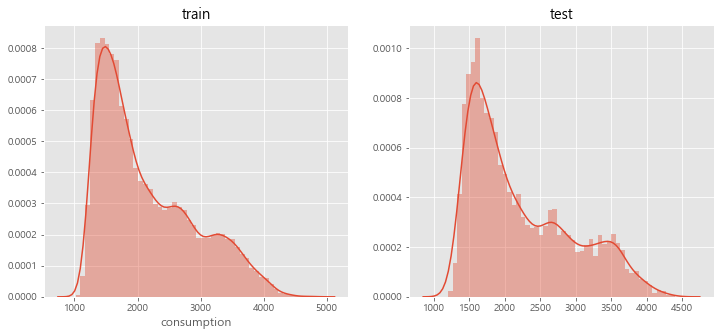

In [226]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title='train')
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title='test')

In [227]:
test['RFPredictions'] = RFPredictions
test

consumption  temperature  humidity  windSpeed weekday  \
date                                                                         
2019-01-01 00:00:00      1924.32        -4.30      59.0       0.90       1   
2019-01-01 01:00:00      2043.36        -2.70      53.0       1.50       1   
2019-01-01 02:00:00      1788.96        -2.00      51.0       2.40       1   
2019-01-01 03:00:00      1781.76        -1.20      53.0       1.80       1   
2019-01-01 04:00:00      1777.44        -0.60      52.0       3.20       1   
2019-01-01 05:00:00      1965.60        -0.70      49.0       3.40       1   
2019-01-01 06:00:00      1829.76        -1.10      52.0       3.20       1   
2019-01-01 07:00:00      1850.88        -1.50      53.0       2.60       1   
2019-01-01 08:00:00      1921.92        -1.70      52.0       2.60       1   
2019-01-01 09:00:00      1917.60        -2.00      48.0       2.90       1   
2019-01-01 10:00:00      1947.36        -2.65      46.0       2.65       1   
2019-01-01 11:00:00      1862.88        -3.30      44.0       2.40       1   
2019-01-01 12:00:00      1904.64        -4.00      41.0       3.10       1   
2019-01-01 13:00:00      1891.20        -4.50      46.0       1.00       1   
2019-01-01 14:00:00      2018.40        -4.90      50.0       1.05       1   
2019-01-01 15:00:00      2024.16        -5.30      51.5       1.10       1   
2019-01-01 16:00:00      2069.76        -5.10      53.0       1.50       1   
2019-01-01 17:00:00      2068.32        -5.90      56.0       0.70       1   
2019-01-01 18:00:00      1947.84        -6.90      56.0       0.60       1   
2019-01-01 19:00:00      1999.20        -7.20      62.0       0.40       1   
2019-01-01 20:00:00      1995.84        -7.70      62.0       0.80       1   
2019-01-01 21:00:00      2050.56        -7.60      66.0       0.50       1   
2019-01-01 22:00:00      2016.96        -8.00      68.0       0.80       1   
2019-01-01 23:00:00      1925.76        -6.80      65.0       0.80       1   
2019-01-02 00:00:00      1849.92        -4.20      65.0       1.10       2   
2019-01-02 01:00:00      1954.08        -2.70      40.0       1.20       2   
2019-01-02 02:00:00      1741.44        -2.00      33.0       2.10       2   
2019-01-02 03:00:00      1700.64        -1.10      35.0       2.40       2   
2019-01-02 04:00:00      1654.08        -0.40      28.0       2.00       2   
2019-01-02 05:00:00      1890.72        -0.50      28.0       2.90       2   
...                          ...          ...       ...        ...     ...   
2019-12-30 18:00:00      2822.88        -8.10      54.0       2.00       0   
2019-12-30 19:00:00      2624.64        -8.50      50.0       1.60       0   
2019-12-30 20:00:00      2460.48        -8.90      51.0       1.80       0   
2019-12-30 21:00:00      2334.72        -9.10      47.0       3.30       0   
2019-12-30 22:00:00      2160.00        -9.20      46.0       2.00       0   
2019-12-30 23:00:00      2002.08        -8.90      41.0       1.90       0   
2019-12-31 00:00:00      1976.16        -8.20      36.0       2.00       1   
2019-12-31 01:00:00      1969.92        -7.20      33.0       2.10       1   
2019-12-31 02:00:00      1905.60        -6.40      32.0       2.00       1   
2019-12-31 03:00:00      1915.68        -5.30      31.0       2.30       1   
2019-12-31 04:00:00      1965.60        -4.30      32.0       2.90       1   
2019-12-31 05:00:00      1975.20        -4.30      32.0       2.20       1   
2019-12-31 06:00:00      2208.00        -4.30      30.0       2.60       1   
2019-12-31 07:00:00      2393.28        -4.80      34.0       2.70       1   
2019-12-31 08:00:00      2621.28        -5.00      34.0       2.30       1   
2019-12-31 09:00:00      3208.32        -5.30      36.0       1.80       1   
2019-12-31 10:00:00      3434.88        -5.30      42.0       1.40       1   
2019-12-31 11:00:00      3533.76        -5.60      37.0       1.70       1   
2019-12-31 12:00:00      3456.48        -6.

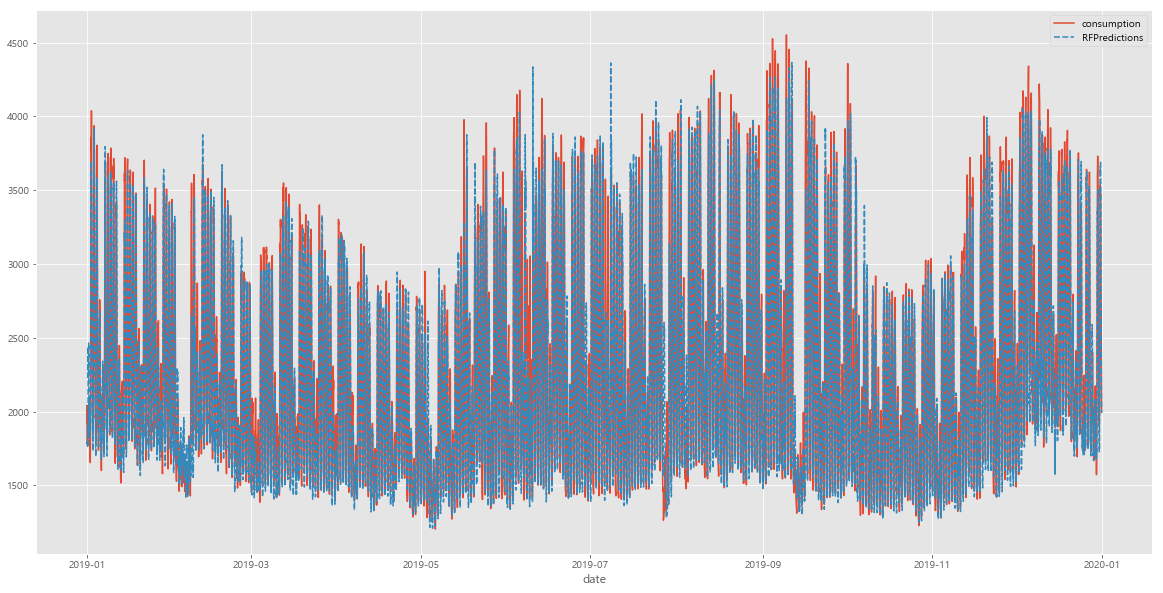

In [228]:
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(data=test[['consumption','RFPredictions']])

#figure, axes = plt.subplots(nrows=1)
#figure.set_size_inches(18,10)

#plt.sca(axes[0])
#plt.xticks(rotation=30,ha='right')
#axes[0].set(ylabel='consumption')
#sns.countplot(data=test[['consumption','predictions']],ax=axes[0])


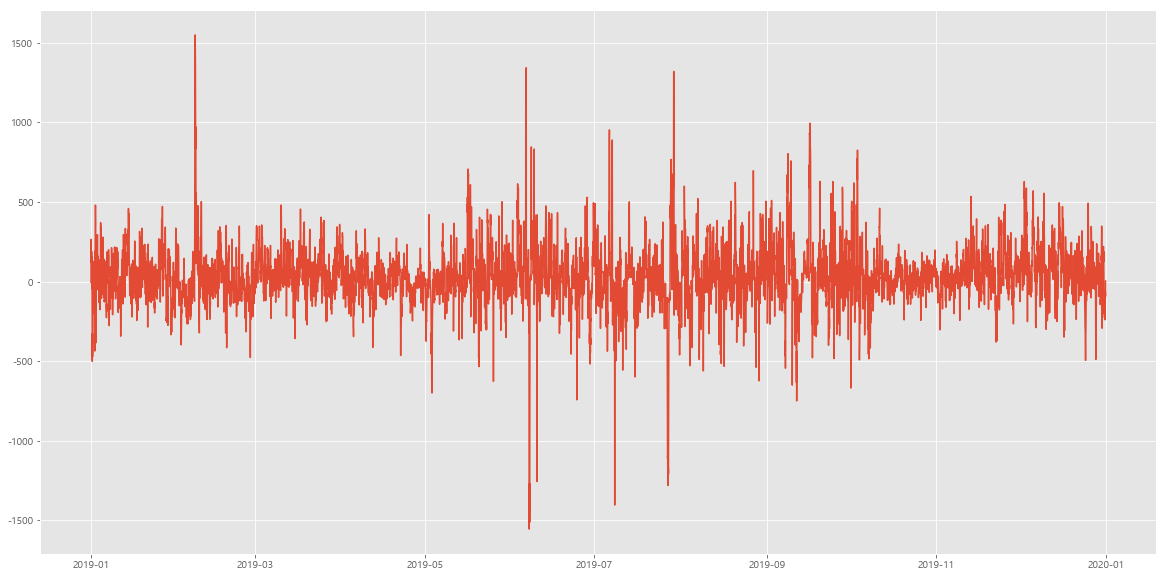

In [229]:
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(data=test['consumption']-test['RFPredictions'])

In [230]:
# 평균 절대 백분율 오차
print("MAPE : " + str(abs((test['consumption']-test['RFPredictions'])/test['consumption']).sum() * 100 / len(test)))

MAPE : 5.273365350905776


# Light GBM

In [79]:
import lightgbm as lgb
from math import sqrt
from sklearn.metrics import mean_squared_error

In [80]:
lgb_dtrain=lgb.Dataset(data=x_train,label=y_train)
lgb_param = {'max_depth': 25,
             'num_leaves':40,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression',
            } # 목적 함수 (L2 Loss)
lgb_model=lgb.train(params=lgb_param,train_set=lgb_dtrain)
LGBPredict=lgb_model.predict(x_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 35064, number of used features: 9
[LightGBM] [Info] Start training from score 2150.797996


In [81]:
LGBPredictions=lgb_model.predict(x_test)

print(LGBPredictions.shape)
LGBPredictions[0:10]
print("RMSE : {}".format(math.sqrt(mean_squared_error(LGBPredictions,y_test))))

(8760,)
RMSE : 169.22796275169554


[Text(0.5, 1.0, 'test')]

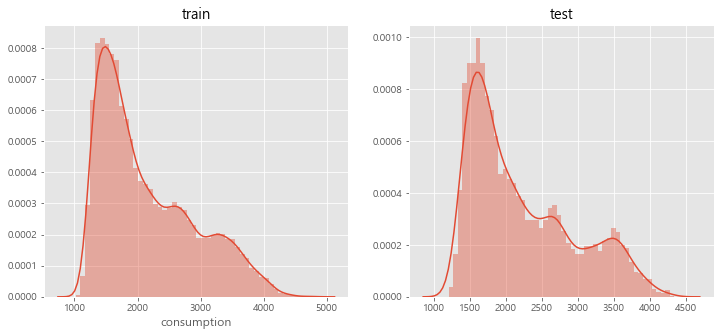

In [82]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title='train')
sns.distplot(LGBPredictions,ax=ax2,bins=50)
ax2.set(title='test')

In [83]:
test['LGBPredictions'] = LGBPredictions
test

consumption  temperature  humidity  windSpeed weekday  \
date                                                                         
2019-01-01 00:00:00      1924.32        -4.30      59.0       0.90       1   
2019-01-01 01:00:00      2043.36        -2.70      53.0       1.50       1   
2019-01-01 02:00:00      1788.96        -2.00      51.0       2.40       1   
2019-01-01 03:00:00      1781.76        -1.20      53.0       1.80       1   
2019-01-01 04:00:00      1777.44        -0.60      52.0       3.20       1   
2019-01-01 05:00:00      1965.60        -0.70      49.0       3.40       1   
2019-01-01 06:00:00      1829.76        -1.10      52.0       3.20       1   
2019-01-01 07:00:00      1850.88        -1.50      53.0       2.60       1   
2019-01-01 08:00:00      1921.92        -1.70      52.0       2.60       1   
2019-01-01 09:00:00      1917.60        -2.00      48.0       2.90       1   
2019-01-01 10:00:00      1947.36        -2.65      46.0       2.65       1   
2019-01-01 11:00:00      1862.88        -3.30      44.0       2.40       1   
2019-01-01 12:00:00      1904.64        -4.00      41.0       3.10       1   
2019-01-01 13:00:00      1891.20        -4.50      46.0       1.00       1   
2019-01-01 14:00:00      2018.40        -4.90      50.0       1.05       1   
2019-01-01 15:00:00      2024.16        -5.30      51.5       1.10       1   
2019-01-01 16:00:00      2069.76        -5.10      53.0       1.50       1   
2019-01-01 17:00:00      2068.32        -5.90      56.0       0.70       1   
2019-01-01 18:00:00      1947.84        -6.90      56.0       0.60       1   
2019-01-01 19:00:00      1999.20        -7.20      62.0       0.40       1   
2019-01-01 20:00:00      1995.84        -7.70      62.0       0.80       1   
2019-01-01 21:00:00      2050.56        -7.60      66.0       0.50       1   
2019-01-01 22:00:00      2016.96        -8.00      68.0       0.80       1   
2019-01-01 23:00:00      1925.76        -6.80      65.0       0.80       1   
2019-01-02 00:00:00      1849.92        -4.20      65.0       1.10       2   
2019-01-02 01:00:00      1954.08        -2.70      40.0       1.20       2   
2019-01-02 02:00:00      1741.44        -2.00      33.0       2.10       2   
2019-01-02 03:00:00      1700.64        -1.10      35.0       2.40       2   
2019-01-02 04:00:00      1654.08        -0.40      28.0       2.00       2   
2019-01-02 05:00:00      1890.72        -0.50      28.0       2.90       2   
...                          ...          ...       ...        ...     ...   
2019-12-30 18:00:00      2822.88        -8.10      54.0       2.00       0   
2019-12-30 19:00:00      2624.64        -8.50      50.0       1.60       0   
2019-12-30 20:00:00      2460.48        -8.90      51.0       1.80       0   
2019-12-30 21:00:00      2334.72        -9.10      47.0       3.30       0   
2019-12-30 22:00:00      2160.00        -9.20      46.0       2.00       0   
2019-12-30 23:00:00      2002.08        -8.90      41.0       1.90       0   
2019-12-31 00:00:00      1976.16        -8.20      36.0       2.00       1   
2019-12-31 01:00:00      1969.92        -7.20      33.0       2.10       1   
2019-12-31 02:00:00      1905.60        -6.40      32.0       2.00       1   
2019-12-31 03:00:00      1915.68        -5.30      31.0       2.30       1   
2019-12-31 04:00:00      1965.60        -4.30      32.0       2.90       1   
2019-12-31 05:00:00      1975.20        -4.30      32.0       2.20       1   
2019-12-31 06:00:00      2208.00        -4.30      30.0       2.60       1   
2019-12-31 07:00:00      2393.28        -4.80      34.0       2.70       1   
2019-12-31 08:00:00      2621.28        -5.00      34.0       2.30       1   
2019-12-31 09:00:00      3208.32        -5.30      36.0       1.80       1   
2019-12-31 10:00:00      3434.88        -5.30      42.0       1.40       1   
2019-12-31 11:00:00      3533.76        -5.60      37.0       1.70       1   
2019-12-31 12:00:00      3456.48        -6.

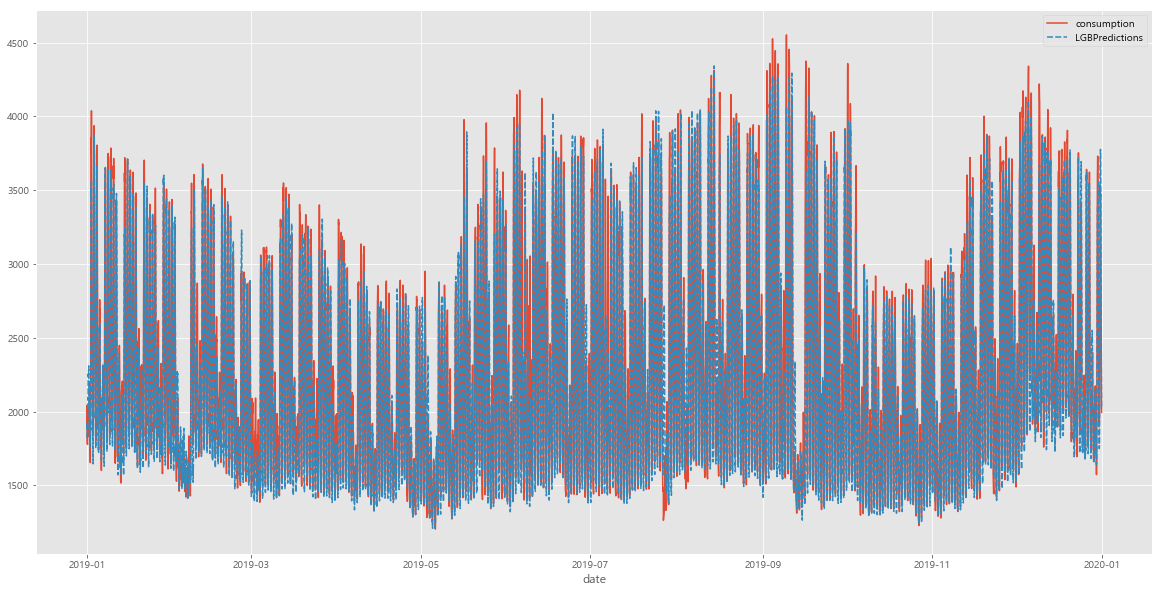

In [84]:
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(data=test[['consumption','LGBPredictions']])

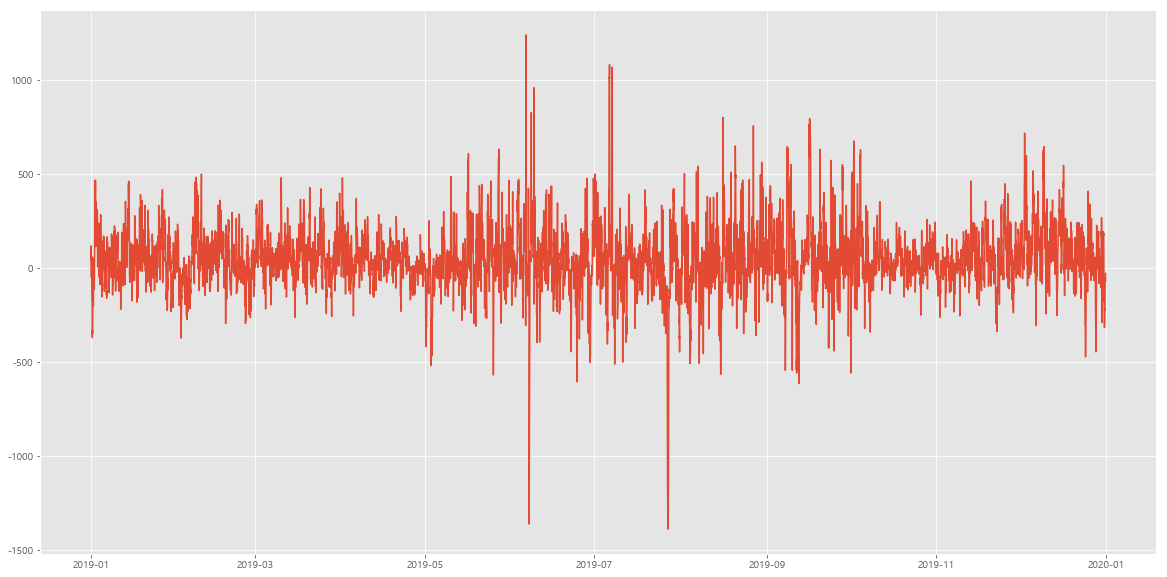

In [85]:
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(data=test['consumption']-test['LGBPredictions'])

In [86]:
# 평균 절대 백분율 오차
print("MAPE : " + str(abs((test['consumption']-test['LGBPredictions'])/test['consumption']).sum() * 100 / len(test)))

MAPE : 4.985359700750729


# SHAP plot

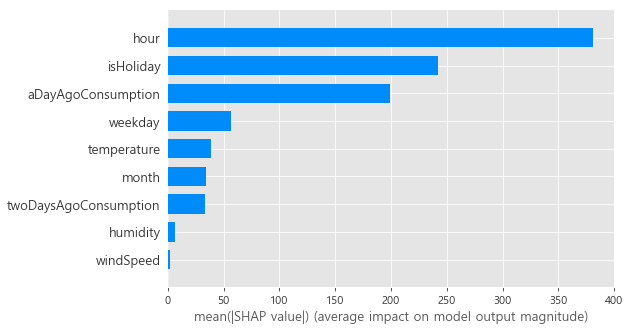

In [87]:
import shap
shap_values = shap.TreeExplainer(lgb_model).shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")

# Save Model

In [88]:
import pickle

from sklearn.externals import joblib

joblib.dump(lgb_model, 'sejong_power_consumption_model.pkl')

['sejong_power_consumption_model.pkl']

# Load Model

In [44]:
loadedModel = joblib.load('sejong_power_consumption_model.pkl')

In [45]:
loadedPredictions = loadedModel.predict(x_test)

## 하루, 이틀 전 전력 사용량 사용하지 않은 모델 학습

In [5]:
import lightgbm as lgb
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle
from sklearn.externals import joblib

# read train Data
originData = pd.read_excel('sejong_power_consumption_per_hour_train_data.xlsx', index=True,index_col='date' ,sheet_name ="Sheet1" )
data= pd.read_excel('sejong_power_consumption_per_hour_train_data.xlsx', index=True,index_col='date' ,sheet_name ="Sheet1" )

# # load model
# loadedModel = joblib.load('sejong_power_consumption_model.pkl')

index = data.index
# add columns

data['month'] = index.month
data['day'] = index.day
data['hour'] = index.hour

# add columns about n days ago conumption

# a Day Ago
aDayAgoConsumption = pd.DataFrame(data=None, index=index-dt.timedelta(days=1), columns=None, dtype=float, copy=False)
aDayAgoConsumption['consumption'] = data['consumption']
aDayAgoConsumption.index = aDayAgoConsumption.index+dt.timedelta(days=1)

# two Day Ago
twoDaysAgoConsumption = pd.DataFrame(data=None, index=index-dt.timedelta(days=2), columns=None, dtype=float, copy=False)
twoDaysAgoConsumption['consumption'] = data['consumption']
twoDaysAgoConsumption.index = twoDaysAgoConsumption.index+dt.timedelta(days=2)

# add column
data['aDayAgoConsumption'] = aDayAgoConsumption
data['twoDaysAgoConsumption'] = twoDaysAgoConsumption

data = data.fillna(data.mean())

categorical_feature_name = ['weekday','isHoliday','month','hour']

for var in categorical_feature_name :
    data[var] = data[var].astype('category')
    
# split data to train and test
train, test = train_test_split(data, test_size = 0.3, shuffle=False)

# for var in categorical_feature_name :
#     train[var] = train[var].astype('category')
#     test[var] = test[var].astype('category')

# feature_names = ['temperature','humidity','windSpeed','weekday','isHoliday',
#                  'month','hour','aDayAgoConsumption','twoDaysAgoConsumption']

feature_names = ['temperature','humidity','windSpeed','weekday','isHoliday',
                 'month','hour']

x_train = train[feature_names]
x_test = test[feature_names]

label_name = 'consumption'

y_train = train[label_name]
y_test = test[label_name]

# create Model
lgb_dtrain=lgb.Dataset(data=x_train,label=y_train)
lgb_param = {'max_depth': 25,
             'num_leaves':40,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression',
            } # 목적 함수 (L2 Loss)

lgb_model=lgb.train(params=lgb_param,train_set=lgb_dtrain)


# add prediction column
featureData = data[feature_names]
prediction = lgb_model.predict(featureData)
originData['prediction'] = prediction

# save model to pkl
joblib.dump(lgb_model, 'sejong_power_consumption_model2.pkl')


# plt.rcParams["figure.figsize"] = (20,10)
# sns.lineplot(data=originData[['consumption','prediction']])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 35280, number of used features: 7
[LightGBM] [Info] Start training from score 2152.674199


['sejong_power_consumption_model2.pkl']